In [1]:
import zipfile
import pandas as pd

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


import numpy as np
import pandas as pd
from numpy.linalg import cholesky

from utils.cholesky_rnn import *
from utils.cov_data_loader import CustomCovDataLoader

In [3]:
# Path to the ZIP file
zip_path = '../../data/Data_60min_cleaned.zip'

DfLoader = CustomCovDataLoader(zip_path, n_first=5)
merged_df = DfLoader.load_data()
merged_df_minutely = DfLoader.transform_data(merged_df).copy()
merged_df_hourly = DfLoader.transform_data(merged_df, freq='1h').copy()

CSV files in the ZIP: ['Data_Cleaned/', 'Data_Cleaned/AAPL_1min_data_cleaned.csv', 'Data_Cleaned/AMGN_1min_data_cleaned.csv', 'Data_Cleaned/AXP_1min_data_cleaned.csv', 'Data_Cleaned/BA_1min_data_cleaned.csv', 'Data_Cleaned/CAT_1min_data_cleaned.csv', 'Data_Cleaned/CRM_1min_data_cleaned.csv', 'Data_Cleaned/CSCO_1min_data_cleaned.csv', 'Data_Cleaned/CVX_1min_data_cleaned.csv', 'Data_Cleaned/DIA_1min_data_cleaned.csv', 'Data_Cleaned/DIS_1min_data_cleaned.csv', 'Data_Cleaned/GS_1min_data_cleaned.csv', 'Data_Cleaned/HD_1min_data_cleaned.csv', 'Data_Cleaned/HON_1min_data_cleaned.csv', 'Data_Cleaned/IBM_1min_data_cleaned.csv', 'Data_Cleaned/INTC_1min_data_cleaned.csv', 'Data_Cleaned/JNJ_1min_data_cleaned.csv', 'Data_Cleaned/JPM_1min_data_cleaned.csv', 'Data_Cleaned/KO_1min_data_cleaned.csv', 'Data_Cleaned/MCD_1min_data_cleaned.csv', 'Data_Cleaned/MMM_1min_data_cleaned.csv', 'Data_Cleaned/MRK_1min_data_cleaned.csv', 'Data_Cleaned/MSFT_1min_data_cleaned.csv', 'Data_Cleaned/NKE_1min_data_cleaned

In [4]:
merged_df_minutely.head()

AAPL_pret  AMGN_pret  AXP_pret   BA_pret  CAT_pret
timestamp                                                              
2016-01-04 09:31:00   0.000396   0.000431  0.000394  0.000140 -0.004648
2016-01-04 09:32:00   0.003516  -0.002373  0.000951 -0.002142 -0.002711
2016-01-04 09:33:00  -0.001007  -0.001557 -0.001882 -0.000826  0.002894
2016-01-04 09:34:00  -0.002635   0.000667 -0.002989 -0.001682  0.000678
2016-01-04 09:35:00   0.001368   0.002146  0.000885  0.000928 -0.000452

In [5]:
merged_df_hourly.loc[(merged_df_hourly == 0).any(axis=1)]

AAPL_pret  AMGN_pret  AXP_pret   BA_pret  CAT_pret
timestamp                                                              
2016-05-12 15:00:00   0.003916   0.003828  0.001966  0.002571  0.000000
2017-05-18 13:00:00   0.003372   0.001142  0.002699  0.001408  0.000000
2017-07-03 15:00:00  -0.000236   0.000000  0.000000  0.000000 -0.000551
2017-07-03 16:00:00   0.000491   0.000000  0.000000  0.000000 -0.000321
2017-11-24 14:00:00  -0.000482   0.000235  0.000078  0.000000 -0.000329
2017-11-24 15:00:00  -0.000107   0.000000 -0.000056  0.000000 -0.000136
2017-11-24 16:00:00  -0.000231   0.000000 -0.000022  0.000000  0.000000
2018-07-03 16:00:00   0.000470   0.000000  0.002364 -0.002001  0.000334
2018-08-23 11:00:00  -0.003660  -0.002545  0.000000 -0.000616 -0.005192
2018-11-23 15:00:00  -0.000338  -0.000155  0.000000  0.002014  0.000782
2018-11-23 16:00:00  -0.000271   0.000000  0.000000  0.000000 -0.001866
2018-12-24 15:00:00   0.001482   0.000000  0.000290 -0.000188  0.000814
2018-12-24 16:00:00   0.001092   0.000000  0.000000  0.001210  0.001070
2019-01-08 15:00:00   0.000951   0.002673  0.000000 -0.000069 -0.005065
2019-07-03 15:00:00  -0.000369   0.000000  0.000000 -0.001533  0.000000
2019-07-03 16:00:00   0.000118   0.000000  0.000000  0.000000  0.000000
2019-11-29 15:00:00   0.000590   0.000000  0.000000 -0.000854  0.001646
2019-11-29 16:00:00  -0.000615   0.000000  0.000000 -0.000194  0.000063
2019-12-24 14:00:00  -0.000047  -0.000028 -0.000067 -0.000120  0.000000
2019-12-24 15:00:00   0.000491   0.000000  0.000000  0.000077  0.000000
2019-12-24 16:00:00  -0.000070   0.000000  0.000000 -0.000648  0.000000
2020-11-27 16:00:00   0.000257   0.000000  0.000000  0.000462  0.000343
2020-12-24 14:00:00  -0.000051   0.000141 -0.000019 -0.001059  0.000000
2020-12-24 15:00:00   0.000202   0.000174  0.000000 -0.000722  0.000000
2020-12-24 16:00:00  -0.000454   0.000000  0.000000  0.000999  0.000000
2021-11-26 15:00:00  -0.000635   0.000000  0.003310  0.000168  0.001426
2021-11-26 16:00:00  -0.001207   0.000000  0.000696  0.002368 -0.001743
2022-11-25 14:00:00   0.000124   0.000000  0.000476 -0.000449  0.000000
2022-11-25 15:00:00  -0.000023   0.000000  0.000000  0.000002  0.000000
2022-11-25 16:00:00  -0.000056   0.000000  0.000000  0.000465  0.000000
2023-05-30 13:00:00   0.002468   0.007261  0.000000 -0.006232  0.002583
2023-06-09 16:00:00  -0.005507  -0.002977  0.000000 -0.000123  0.002516
2023-11-24 15:00:00   0.000175   0.000000  0.001689 -0.000243  0.000549

#### Defining Loss functions

In [6]:
'''RMSE'''
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()

    def forward(self,yhat,y):
        return torch.sqrt(self.mse(yhat,y))
    
'''Penalized RMSE'''
class SignSensitiveRMSELoss(nn.Module):
    def __init__(self, lambda_weight):
        super().__init__()
        self.mse = nn.MSELoss()
        self.lambda_weight = lambda_weight

    def forward(self, yhat, y):
        # Ensure yhat and y are tensors and their shapes are compatible
        assert isinstance(yhat, torch.Tensor), "yhat must be a tensor"
        assert isinstance(y, torch.Tensor), "y must be a tensor"
        assert yhat.shape == y.shape, "Shapes of yhat and y must match"

        # RMSE loss
        mse_loss = self.mse(yhat, y)  # MSE output is a scalar tensor
        rmse_loss = torch.sqrt(mse_loss)  # Apply sqrt to the scalar tensor

        # Reconstruct covariance matrices from true and predicted Cholesky factors
        def reconstruct_cov(cholesky_vec):
            batch_size = cholesky_vec.size(0)
            n = int((-1 + torch.sqrt(torch.tensor(1 + 8 * cholesky_vec.size(1), dtype=torch.float32))) // 2)
            L = torch.zeros(batch_size, n, n, device=cholesky_vec.device)
            tril_indices = torch.tril_indices(row=n, col=n, device=cholesky_vec.device)
            L[:, tril_indices[0], tril_indices[1]] = cholesky_vec
            return L @ L.transpose(1, 2)

        true_cov = reconstruct_cov(y)
        pred_cov = reconstruct_cov(yhat)

        # Sign-consistency penalty
        sign_diff = torch.sign(true_cov) - torch.sign(pred_cov)
        sign_penalty = torch.sum((sign_diff ** 2) / 4, dim=(1, 2))  # Penalize per matrix
        sign_penalty = torch.mean(sign_penalty)  # Average over batch

        # Total loss
        total_loss = rmse_loss + self.lambda_weight * sign_penalty
        return total_loss
    
'''Eucledian Distance'''
class EuclideanLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, yhat, y):
        def reconstruct_cov(cholesky_vec):
            batch_size = cholesky_vec.size(0)
            n = int((-1 + torch.sqrt(torch.tensor(1 + 8 * cholesky_vec.size(1), dtype=torch.float32))) // 2)
            L = torch.zeros(batch_size, n, n, device=cholesky_vec.device)
            tril_indices = torch.tril_indices(row=n, col=n, device=cholesky_vec.device)
            L[:, tril_indices[0], tril_indices[1]] = cholesky_vec
            return L @ L.transpose(1, 2)
        
        true_cov = reconstruct_cov(y)
        pred_cov = reconstruct_cov(yhat)
        diff = pred_cov - true_cov
        
        # Vectorize lower triangular part (including diagonal)
        batch_size = diff.size(0)
        tril_indices = torch.tril_indices(row=diff.size(1), col=diff.size(2), device=diff.device)
        vech_diff = diff[:, tril_indices[0], tril_indices[1]]
        
        euclidean_distance = torch.sum(vech_diff ** 2, dim=1)
        return torch.mean(euclidean_distance)

class FrobeniusLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, yhat, y):
        def reconstruct_cov(cholesky_vec):
            batch_size = cholesky_vec.size(0)
            n = int((-1 + torch.sqrt(torch.tensor(1 + 8 * cholesky_vec.size(1), dtype=torch.float32))) // 2)
            L = torch.zeros(batch_size, n, n, device=cholesky_vec.device)
            tril_indices = torch.tril_indices(row=n, col=n, device=cholesky_vec.device)
            L[:, tril_indices[0], tril_indices[1]] = cholesky_vec
            return L @ L.transpose(1, 2)
        
        true_cov = reconstruct_cov(y)
        pred_cov = reconstruct_cov(yhat)
        frobenius_distance = torch.norm(pred_cov - true_cov, p='fro', dim=(1, 2))
        return torch.mean(frobenius_distance)
    

class FrobeniusLossWithSignPenalty(nn.Module):
    def __init__(self, lambda_penalty=0.1):
        """
        Initializes the FrobeniusLossWithSignPenalty.

        Parameters:
        - lambda_penalty: Regularization parameter for the sign penalty term.
        """
        super().__init__()
        self.lambda_penalty = lambda_penalty

    def forward(self, yhat, y):
        def reconstruct_cov(cholesky_vec):
            batch_size = cholesky_vec.size(0)
            n = int((-1 + torch.sqrt(torch.tensor(1 + 8 * cholesky_vec.size(1), dtype=torch.float32))) // 2)
            L = torch.zeros(batch_size, n, n, device=cholesky_vec.device)
            tril_indices = torch.tril_indices(row=n, col=n, device=cholesky_vec.device)
            L[:, tril_indices[0], tril_indices[1]] = cholesky_vec
            return L @ L.transpose(1, 2)
        
        # Reconstruct covariance matrices
        true_cov = reconstruct_cov(y)
        pred_cov = reconstruct_cov(yhat)
        
        # Frobenius norm loss
        frobenius_distance = torch.norm(pred_cov - true_cov, p='fro', dim=(1, 2))
        
        # Calculate sign penalty only for the lower triangular part
        tril_indices = torch.tril_indices(row=true_cov.size(1), col=true_cov.size(2), device=true_cov.device)
        true_signs = torch.sign(true_cov[:, tril_indices[0], tril_indices[1]])
        pred_signs = torch.sign(pred_cov[:, tril_indices[0], tril_indices[1]])
        
        # Compute the sign difference penalty
        sign_diff = (true_signs - pred_signs) / 2  # Difference in signs (values: -1, 0, 1)
        sign_penalty = torch.sum(sign_diff ** 2, dim=1)  # Penalize squared difference in signs
        
        # Combine the losses
        total_loss = torch.mean(frobenius_distance + self.lambda_penalty * sign_penalty)
        return total_loss

class SignAccuracyLoss(nn.Module):
    def __init__(self):
        """
        Initializes the SignAccuracyLoss class.
        This loss calculates the mean accuracy of the predicted signs
        compared to the true signs for the lower triangular part of covariance matrices.
        """
        super().__init__()

    def forward(self, yhat, y):
        def reconstruct_cov(cholesky_vec):
            batch_size = cholesky_vec.size(0)
            n = int((-1 + torch.sqrt(torch.tensor(1 + 8 * cholesky_vec.size(1), dtype=torch.float32))) // 2)
            L = torch.zeros(batch_size, n, n, device=cholesky_vec.device)
            tril_indices = torch.tril_indices(row=n, col=n, device=cholesky_vec.device)
            L[:, tril_indices[0], tril_indices[1]] = cholesky_vec
            return L @ L.transpose(1, 2)
        
        # Reconstruct covariance matrices
        true_cov = reconstruct_cov(y)
        pred_cov = reconstruct_cov(yhat)

        # Extract lower triangular indices
        tril_indices = torch.tril_indices(row=true_cov.size(1), col=true_cov.size(2), device=true_cov.device)

        # Get true and predicted signs for the lower triangular part
        true_signs = torch.sign(true_cov[:, tril_indices[0], tril_indices[1]])
        pred_signs = torch.sign(pred_cov[:, tril_indices[0], tril_indices[1]])

        # Calculate accuracy of sign prediction
        correct_signs = (true_signs == pred_signs).float()  # Element-wise comparison (1 if correct, 0 if not)
        sign_accuracy = torch.mean(correct_signs)  # Mean accuracy across the batch

        return 1 - sign_accuracy  # Return 1 - accuracy to use it as a "loss" (minimizing it maximizes accuracy)


## Hourly data model

In [5]:
# Step 6.1: Calculate Cholesky vectors
cholesky_vectors = calculate_hourly_realized_covariance(merged_df_hourly, freq='d', return_cholesky=True, transform=True)
## Using transform = True so that the error metrics are comparable to the reference paper
print(f"Shape of Cholesky vectors: {cholesky_vectors.shape}")

# Step 6.2: Prepare datasets and dataloaders
sequence_length = 10
train_dataset, test_dataset = prepare_data(cholesky_vectors, sequence_length)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
print(f"Length of train loader: {len(train_loader)*16}. Test: {len(test_loader)*16}")

# Step 6.3: Define model, loss function, and optimizer
input_size = cholesky_vectors.shape[1]  # Length of Cholesky vector
hidden_size = 64  # Can be tuned
output_size = cholesky_vectors.shape[1]



model = CholeskyLSTM(input_size, hidden_size, output_size, normalize=False)

criterion = FrobeniusLossWithSignPenalty(lambda_penalty=1e-03)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-03)

criterion1 = FrobeniusLossWithSignPenalty(lambda_penalty=1e-03)
criterion2 = FrobeniusLoss()
criterion3 = SignAccuracyLoss()

crit_dict = {'f_norm':criterion1, 'f_norm_pen':criterion2, 'acc':criterion3}

# Step 6.4: Train the model
cr_values = train_model(model, train_loader, criterion, optimizer, num_epochs=100, crit_dict=crit_dict)


Shape of Cholesky vectors: (2085, 15)
Length of train loader: 1664. Test: 416
Epoch [1/100], Loss: 0.011307483
Epoch [2/100], Loss: 0.007267639
Epoch [3/100], Loss: 0.007186306
Epoch [4/100], Loss: 0.007655163
Epoch [5/100], Loss: 0.007756284
Epoch [6/100], Loss: 0.007788343
Epoch [7/100], Loss: 0.007446749
Epoch [8/100], Loss: 0.007170922
Epoch [9/100], Loss: 0.007090083
Epoch [10/100], Loss: 0.007385436
Epoch [11/100], Loss: 0.007289162
Epoch [12/100], Loss: 0.007625087
Epoch [13/100], Loss: 0.007314365
Epoch [14/100], Loss: 0.007489202
Epoch [15/100], Loss: 0.007158932
Epoch [16/100], Loss: 0.006985454
Epoch [17/100], Loss: 0.007307631
Epoch [18/100], Loss: 0.007222923
Epoch [19/100], Loss: 0.007125038
Epoch [20/100], Loss: 0.007095188
Epoch [21/100], Loss: 0.007361651
Epoch [22/100], Loss: 0.007220102
Epoch [23/100], Loss: 0.007108894
Epoch [24/100], Loss: 0.007508502
Epoch [25/100], Loss: 0.007250935
Epoch [26/100], Loss: 0.007412438
Epoch [27/100], Loss: 0.007205114
Epoch [28/100

## Step 6.5: Test the model

In [7]:
test_loss, predictions_test, targets_test = test_model(model, test_loader, criterion)

criterion1 = FrobeniusLossWithSignPenalty(lambda_penalty=1e-3)
criterion2 = FrobeniusLoss()
criterion3 = SignAccuracyLoss()

f_loss_pen = criterion1(predictions_test, targets_test)
f_loss = criterion2(predictions_test, targets_test)
acc = criterion3(predictions_test, targets_test)

print(f"accuracy: {1- acc}, f_loss: {f_loss}, f_loss_pen: {f_loss_pen}")

# Print shape of predictions and targets
print(f"Predictions shape: {predictions_test.shape}, Targets shape: {targets_test.shape}")


Test Loss: 0.0064
accuracy: 0.8049139976501465, f_loss: 0.00376349245198071, f_loss_pen: 0.0064133694395422935
Predictions shape: torch.Size([407, 15]), Targets shape: torch.Size([407, 15])


In [8]:
## Reconstructing Covariance matrix of prediction

# Pad the array to fit the lower triangular matrix, if necessary
n = 5 # specify the number of stocks you have in the data
arr = np.array(predictions_test[8])
padded_arr = np.pad(arr, (0, n * (n + 1) // 2 - len(arr)), constant_values=0)

# Create the lower triangular matrix
lower_tri_matrix = np.zeros((n, n), dtype=arr.dtype)
lower_tri_matrix[np.tril_indices(n)] = padded_arr
lower_tri_matrix @ lower_tri_matrix.T

array([[3.0111169e-04, 2.1312560e-05, 2.3032882e-04, 2.6807014e-04,
        1.4853127e-04],
       [2.1312560e-05, 1.7640226e-04, 1.9305160e-04, 1.3985437e-04,
        2.1360948e-04],
       [2.3032882e-04, 1.9305160e-04, 9.9132140e-04, 8.3744148e-04,
        8.0968108e-04],
       [2.6807014e-04, 1.3985437e-04, 8.3744148e-04, 1.5448335e-03,
        8.4725232e-04],
       [1.4853127e-04, 2.1360948e-04, 8.0968108e-04, 8.4725232e-04,
        8.9960697e-04]], dtype=float32)

In [9]:
## Reconstructing Covariance matrix of target

# Pad the array to fit the lower triangular matrix, if necessary
n = 5
arr = np.array(targets_test[8])
padded_arr = np.pad(arr, (0, n * (n + 1) // 2 - len(arr)), constant_values=0)

# Create the lower triangular matrix
lower_tri_matrix = np.zeros((n, n), dtype=arr.dtype)
lower_tri_matrix[np.tril_indices(n)] = padded_arr
lower_tri_matrix @ lower_tri_matrix.T

array([[ 4.6702959e-03,  2.6493386e-04,  2.2633693e-03,  2.5186390e-03,
         2.7481124e-03],
       [ 2.6493386e-04,  1.4607080e-04, -5.0540370e-05, -1.6322827e-04,
         1.7065420e-05],
       [ 2.2633693e-03, -5.0540370e-05,  1.5555604e-03,  2.1184438e-03,
         1.4727414e-03],
       [ 2.5186390e-03, -1.6322827e-04,  2.1184438e-03,  3.3262928e-03,
         1.7254094e-03],
       [ 2.7481124e-03,  1.7065420e-05,  1.4727414e-03,  1.7254094e-03,
         2.0501523e-03]], dtype=float32)

In [10]:
## Constructing element-wise (for covariance matrix) MAE and RMSE

n = 5
rmse_dict = {}
mae_dict = {}
for i in range(n):
    for j in range(i, n):
      rmse_dict[(i,j)] = 0
      mae_dict[(i,j)] = 0

for index, pred in enumerate(predictions_test):
  
  arr_pred = np.array(pred)
  arr_trg = np.array(targets_test[index])
  padded_arr_pred = np.pad(arr_pred, (0, n * (n + 1) // 2 - len(arr_pred)), constant_values=0)
  padded_arr_trg = np.pad(arr_trg, (0, n * (n + 1) // 2 - len(arr_trg)), constant_values=0)

  # Create the lower triangular matrix
  lower_tri_matrix_pred = np.zeros((n, n), dtype=arr_pred.dtype)
  lower_tri_matrix_pred[np.tril_indices(n)] = padded_arr_pred

  lower_tri_matrix_trg = np.zeros((n, n), dtype=arr_trg.dtype)
  lower_tri_matrix_trg[np.tril_indices(n)] = padded_arr_trg

  cov_pred = lower_tri_matrix_pred @ lower_tri_matrix_pred.T
  cov_trg = lower_tri_matrix_trg @ lower_tri_matrix_trg.T

  for i in range(n):
    for j in range(i, n):
      pred_val = cov_pred[i,j]
      trg_val = cov_trg[i,j]
      rmse_dict[(i,j)] += np.square(pred_val - trg_val)
      mae_dict[(i,j)] += np.abs(pred_val - trg_val)

rmse_dict = {key: np.sqrt(val/len(predictions_test)) for key, val in rmse_dict.items()}
mae_dict = {key: val/len(predictions_test) for key, val in mae_dict.items()}

In [11]:
{key:val*1e2 for key, val in rmse_dict.items()}

{(0, 0): 0.12156787322523253,
 (0, 1): 0.05594548739613035,
 (0, 2): 0.08538178915675389,
 (0, 3): 0.09086744379560618,
 (0, 4): 0.07679034683350747,
 (1, 1): 0.1113650935733618,
 (1, 2): 0.05276381116764413,
 (1, 3): 0.059825413196139245,
 (1, 4): 0.06163066120767845,
 (2, 2): 0.21159046377395005,
 (2, 3): 0.12137296441126588,
 (2, 4): 0.08718205006539319,
 (3, 3): 0.22877235382332012,
 (3, 4): 0.13032838635851912,
 (4, 4): 0.18419675588400636}

In [12]:
{key:val*1e2 for key, val in mae_dict.items()}

{(0, 0): 0.06101123287812441,
 (0, 1): 0.03144901901621699,
 (0, 2): 0.045127489379220745,
 (0, 3): 0.052864048504703415,
 (0, 4): 0.0445250455681926,
 (1, 1): 0.04555521860686692,
 (1, 2): 0.03225241882466582,
 (1, 3): 0.03795745517777225,
 (1, 4): 0.034474058421355126,
 (2, 2): 0.08307633199557406,
 (2, 3): 0.07013261281970015,
 (2, 4): 0.053235401778569995,
 (3, 3): 0.12485289525944873,
 (3, 4): 0.06782898630580252,
 (4, 4): 0.0784552944810513}

As a result we get the element-wise RMSE and MAE metrics comparable to what we see in our reference paper.
But there is one problem which is described below.
When we reconstruct the covariance matrix, we can anticipate negative values for covariances.
It is interesting to compare the number of train and test covariance matrices (for both target and predictions) which contains negative elements.

In [78]:
len(predictions)

2781

In [13]:
count_pred_test = 0
count_trg_test = 0

for index, pred_ in enumerate(predictions_test):
  pred = np.array(pred_)
  padded_arr = np.pad(pred, (0, n * (n + 1) // 2 - len(pred)), constant_values=0)

  # Create the lower triangular matrix
  lower_tri_matrix = np.zeros((n, n), dtype=pred.dtype)
  lower_tri_matrix[np.tril_indices(n)] = padded_arr
  cov_matrix = lower_tri_matrix @ lower_tri_matrix.T

  has_negative = (cov_matrix < 0).any()

  count_pred_test += has_negative

  pred = np.array(targets_test[index])
  padded_arr = np.pad(pred, (0, n * (n + 1) // 2 - len(pred)), constant_values=0)

  # Create the lower triangular matrix
  lower_tri_matrix = np.zeros((n, n), dtype=pred.dtype)
  lower_tri_matrix[np.tril_indices(n)] = padded_arr
  cov_matrix = lower_tri_matrix @ lower_tri_matrix.T

  has_negative = (cov_matrix < 0).any()
  
  count_trg_test += has_negative

print(f"Ratio of true covariance matrices with negative elements (one test set): {count_trg_test / len(predictions_test) * 100:.2f}% ")
print(f"Ratio of pred covariance matrices with negative elements (one test set): {count_pred_test / len(predictions_test) * 100:.2f}% ")


Ratio of true covariance matrices with negative elements (one test set): 65.11% 
Ratio of pred covariance matrices with negative elements (one test set): 49.14% 


In [14]:
# Step 6.5: Test the model
# Run testing
train_loss, predictions_train, targets_train = test_model(model, train_loader, criterion)

count_pred_train = 0
count_trg_train = 0

for index, pred_ in enumerate(predictions_train):
  pred = np.array(pred_)
  padded_arr = np.pad(pred, (0, n * (n + 1) // 2 - len(pred)), constant_values=0)

  # Create the lower triangular matrix
  lower_tri_matrix = np.zeros((n, n), dtype=pred.dtype)
  lower_tri_matrix[np.tril_indices(n)] = padded_arr
  cov_matrix = lower_tri_matrix @ lower_tri_matrix.T

  has_negative = (cov_matrix < 0).any()

  count_pred_train += has_negative

  pred = np.array(targets_train[index])
  padded_arr = np.pad(pred, (0, n * (n + 1) // 2 - len(pred)), constant_values=0)

  # Create the lower triangular matrix
  lower_tri_matrix = np.zeros((n, n), dtype=pred.dtype)
  lower_tri_matrix[np.tril_indices(n)] = padded_arr
  cov_matrix = lower_tri_matrix @ lower_tri_matrix.T

  has_negative = (cov_matrix < 0).any()
  
  count_trg_train += has_negative

print(f"Ratio of true covariance matrices with negative elements (one test set): {count_trg_train / len(predictions_train) * 100:.2f}% ")
print(f"Ratio of pred covariance matrices with negative elements (one test set): {count_pred_train / len(predictions_train) * 100:.2f}% ")



Test Loss: 0.0065
Ratio of true covariance matrices with negative elements (one test set): 69.78% 
Ratio of pred covariance matrices with negative elements (one test set): 51.63% 


## Minutely

In [77]:
def calculate_mean_sign_accuracy(cholesky_vectors):
    def reconstruct_cov(cholesky_vec):
        """
        Reconstruct the covariance matrix from the Cholesky vector.
        """
        n = int((-1 + np.sqrt(1 + 8 * cholesky_vec.shape[1])) // 2)
        batch_size = cholesky_vec.shape[0]
        L = np.zeros((batch_size, n, n))
        tril_indices = np.tril_indices(n)
        for i in range(batch_size):
            L[i][tril_indices] = cholesky_vec[i]
        return np.matmul(L, np.transpose(L, axes=(0, 2, 1)))

    # Reconstruct covariance matrices
    true_cov = reconstruct_cov(cholesky_vectors)

    # Extract lower triangular part (including diagonal)
    tril_indices = np.tril_indices(true_cov.shape[1])

    # Calculate individual accuracies
    accuracies = []
    for i in range(true_cov.shape[0]):
        true_signs = np.sign(true_cov[i, tril_indices[0], tril_indices[1]])
        predicted_signs = np.ones_like(true_signs)  # Assume all positive
        accuracy = np.mean(true_signs == predicted_signs)
        accuracies.append(accuracy)

    # Return mean accuracy
    return np.mean(accuracies)

# Example usage
mean_accuracy = calculate_mean_sign_accuracy(cholesky_vectors)
print(f"Mean sign accuracy: {mean_accuracy:.4f}")
print("Accuracy is the accuracy of guessing the sign of the unique elements of the reconstructed covariance matrices. In this cell we suppose that we always predict the positive values of covariances")


Mean sign accuracy: 0.9260
Accuracy is the accuracy of guessing the sign of the unique elements of the reconstructed covariance matrices. In this cell we suppose that we always predict the positive values of covariances


In [7]:
# Step 6.1: Calculate Cholesky vectors
cholesky_vectors = calculate_hourly_realized_covariance(merged_df_minutely, freq='h', return_cholesky=True, transform=False)
print(f"Shape of Cholesky vectors: {cholesky_vectors.shape}")

# Optimal Parameters!!!!!
# hidden_size=128, sequence_length=14, lr=1e-05, penalty:1e-06

# Step 6.2: Prepare datasets and dataloaders
sequence_length = 14
train_dataset, test_dataset = prepare_data(cholesky_vectors, sequence_length)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
print(f"Length of train loader: {len(train_loader)*128}. Test: {len(test_loader)*128}")

# Step 6.3: Define model, loss function, and optimizer
input_size = cholesky_vectors.shape[1]  # Length of Cholesky vector
hidden_size = 128  # Can be tuned
output_size = cholesky_vectors.shape[1]


model = CholeskyLSTM(input_size, hidden_size, output_size, normalize=False)

criterion = FrobeniusLossWithSignPenalty(lambda_penalty=1e-06)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-05)

criterion1 = FrobeniusLossWithSignPenalty(lambda_penalty=1e-06)
criterion2 = FrobeniusLoss()
criterion3 = SignAccuracyLoss()

crit_dict = {'f_norm':criterion1, 'f_norm_pen':criterion2, 'acc':criterion3}

# Step 6.4: Train the model
cr_values = train_model(model, train_loader, criterion, optimizer, num_epochs=100, crit_dict=crit_dict)


Shape of Cholesky vectors: (14084, 15)
Length of train loader: 11264. Test: 2816
Epoch [1/100], Loss: 0.018805556
Epoch [2/100], Loss: 0.012780783
Epoch [3/100], Loss: 0.008266881
Epoch [4/100], Loss: 0.004983161
Epoch [5/100], Loss: 0.002738808
Epoch [6/100], Loss: 0.001345049
Epoch [7/100], Loss: 0.000580809
Epoch [8/100], Loss: 0.000218198
Epoch [9/100], Loss: 0.000074100
Epoch [10/100], Loss: 0.000027007
Epoch [11/100], Loss: 0.000013259
Epoch [12/100], Loss: 0.000009091
Epoch [13/100], Loss: 0.000006769
Epoch [14/100], Loss: 0.000006625
Epoch [15/100], Loss: 0.000006609
Epoch [16/100], Loss: 0.000006606
Epoch [17/100], Loss: 0.000006607
Epoch [18/100], Loss: 0.000006608
Epoch [19/100], Loss: 0.000006611
Epoch [20/100], Loss: 0.000006610
Epoch [21/100], Loss: 0.000006608
Epoch [22/100], Loss: 0.000006607
Epoch [23/100], Loss: 0.000006608
Epoch [24/100], Loss: 0.000006607
Epoch [25/100], Loss: 0.000006608
Epoch [26/100], Loss: 0.000006606
Epoch [27/100], Loss: 0.000006605
Epoch [28/

Text(0.5, 1.0, 'Accuracy of the guessed signs vs epoch')

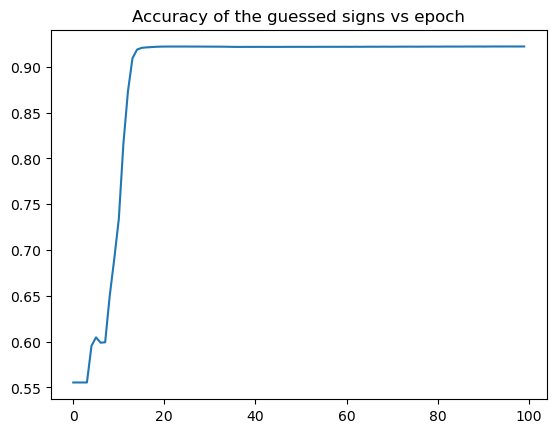

In [79]:
import matplotlib.pyplot as plt
plt.plot(range(100), [1 - i.item() for i in cr_values['acc']])
plt.title("Accuracy of the guessed signs vs epoch")

Text(0.5, 1.0, 'Frobenious norm loss vs epoch')

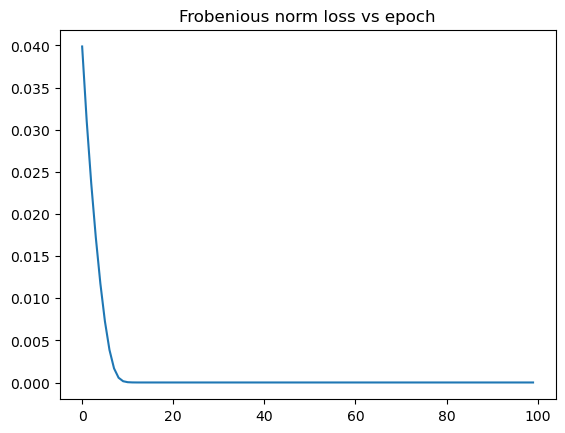

In [78]:
import matplotlib.pyplot as plt
plt.plot(range(100), [i.item() for i in cr_values['f_norm']])
plt.title("Frobenious norm loss vs epoch")

In [ ]:
# Step 6.5: Test the model
# Run testing
test_loss, predictions_test, targets_test = test_model(model, test_loader, criterion)

criterion1 = FrobeniusLossWithSignPenalty(lambda_penalty=1e-6)
criterion2 = FrobeniusLoss()
criterion3 = SignAccuracyLoss()

f_loss_pen = criterion1(predictions_test, targets_test)
f_loss = criterion2(predictions_test, targets_test)
acc = criterion3(predictions_test, targets_test)

print(f"accuracy: {1- acc}, f_loss: {f_loss}, f_loss_pen: {f_loss_pen}")

# Print shape of predictions and targets
print(f"Predictions shape: {predictions_test.shape}, Targets shape: {targets_test.shape}")

Test Loss: 0.0001
accuracy: 0.9403283596038818, f_loss: 3.483484761090949e-06, f_loss_pen: 4.370797341834987e-06
Predictions shape: torch.Size([2802, 15]), Targets shape: torch.Size([2802, 15])


In [ ]:
# See the results on the train set

train_loss, predictions_train, targets_train = test_model(model, train_loader, criterion)

criterion1 = FrobeniusLossWithSignPenalty(lambda_penalty=1e-6)
criterion2 = FrobeniusLoss()
criterion3 = SignAccuracyLoss()

f_loss_pen = criterion1(predictions_train, targets_train)
f_loss = criterion2(predictions_train, targets_train)
acc = criterion3(predictions_train, targets_train)

print(f"accuracy: {1- acc}, f_loss: {f_loss}, f_loss_pen: {f_loss_pen}")

# Print shape of predictions and targets
print(f"Predictions shape: {predictions_train.shape}, Targets shape: {targets_train.shape}")

Test Loss: 0.0001
accuracy: 0.9221491813659668, f_loss: 5.347257683752105e-06, f_loss_pen: 6.504623797809472e-06
Predictions shape: torch.Size([11254, 15]), Targets shape: torch.Size([11254, 15])


In [ ]:
count_pred_test = 0
count_trg_test = 0

n = 5

for index, pred_ in enumerate(predictions_test):
  pred = np.array(pred_)
  padded_arr = np.pad(pred, (0, n * (n + 1) // 2 - len(pred)), constant_values=0)

  # Create the lower triangular matrix
  lower_tri_matrix = np.zeros((n, n), dtype=pred.dtype)
  lower_tri_matrix[np.tril_indices(n)] = padded_arr
  cov_matrix = lower_tri_matrix @ lower_tri_matrix.T

  has_negative = (cov_matrix < 0).any()

  count_pred_test += has_negative

  pred = np.array(targets_test[index])
  padded_arr = np.pad(pred, (0, n * (n + 1) // 2 - len(pred)), constant_values=0)

  # Create the lower triangular matrix
  lower_tri_matrix = np.zeros((n, n), dtype=pred.dtype)
  lower_tri_matrix[np.tril_indices(n)] = padded_arr
  cov_matrix = lower_tri_matrix @ lower_tri_matrix.T

  has_negative = (cov_matrix < 0).any()
  
  count_trg_test += has_negative

print(f"Ratio of true covariance matrices with negative elements (on test set): {count_trg_test / len(predictions_test) * 100:.2f}% ")
print(f"Ratio of pred covariance matrices with negative elements (on test set): {count_pred_test / len(predictions_test) * 100:.2f}% ")


Ratio of true covariance matrices with negative elements (on test set): 34.98% 
Ratio of pred covariance matrices with negative elements (on test set): 0.39% 


In [ ]:
count_pred_test = 0
count_trg_test = 0

for index, pred_ in enumerate(predictions_train):
  pred = np.array(pred_)
  padded_arr = np.pad(pred, (0, n * (n + 1) // 2 - len(pred)), constant_values=0)

  # Create the lower triangular matrix
  lower_tri_matrix = np.zeros((n, n), dtype=pred.dtype)
  lower_tri_matrix[np.tril_indices(n)] = padded_arr
  cov_matrix = lower_tri_matrix @ lower_tri_matrix.T

  has_negative = (cov_matrix < 0).any()

  count_pred_test += has_negative

  pred = np.array(targets_train[index])
  padded_arr = np.pad(pred, (0, n * (n + 1) // 2 - len(pred)), constant_values=0)

  # Create the lower triangular matrix
  lower_tri_matrix = np.zeros((n, n), dtype=pred.dtype)
  lower_tri_matrix[np.tril_indices(n)] = padded_arr
  cov_matrix = lower_tri_matrix @ lower_tri_matrix.T

  has_negative = (cov_matrix < 0).any()
  
  count_trg_test += has_negative

print(f"Ratio of true covariance matrices with negative elements (on test set): {count_trg_test / len(predictions_train) * 100:.2f}% ")
print(f"Ratio of pred covariance matrices with negative elements (on test set): {count_pred_test / len(predictions_train) * 100:.2f}% ")

Test Loss: 0.0001
Ratio of true covariance matrices with negative elements (on test set): 41.59% 
Ratio of pred covariance matrices with negative elements (on test set): 0.45% 


## Cross-Validation

In [48]:
cholesky_vectors.shape

(14084, 15)

Running experiment: hidden_size=15, sequence_length=7, lr=0.001, penalty:1e-05


Running experiment: hidden_size=15, sequence_length=7, lr=0.001, penalty:5e-06


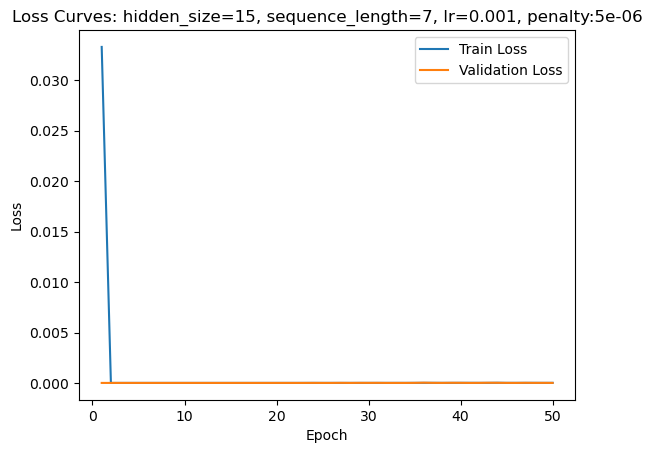

Running experiment: hidden_size=15, sequence_length=7, lr=0.001, penalty:1e-06


Running experiment: hidden_size=15, sequence_length=7, lr=0.0001, penalty:1e-05


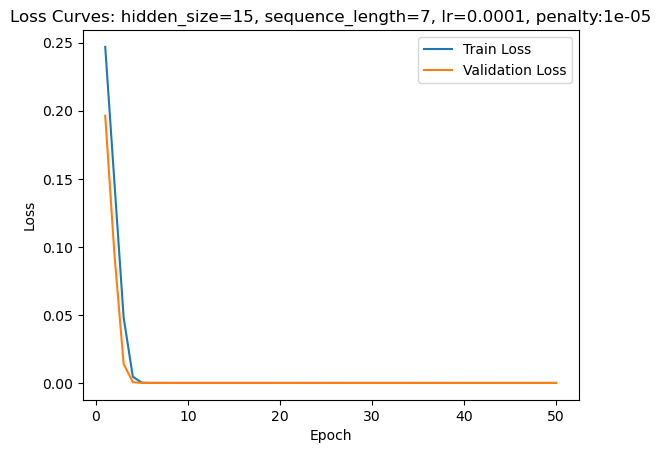

Running experiment: hidden_size=15, sequence_length=7, lr=0.0001, penalty:5e-06


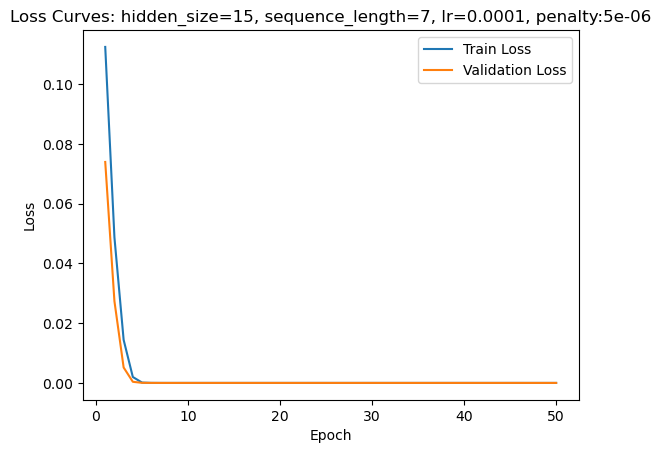

Running experiment: hidden_size=15, sequence_length=7, lr=0.0001, penalty:1e-06


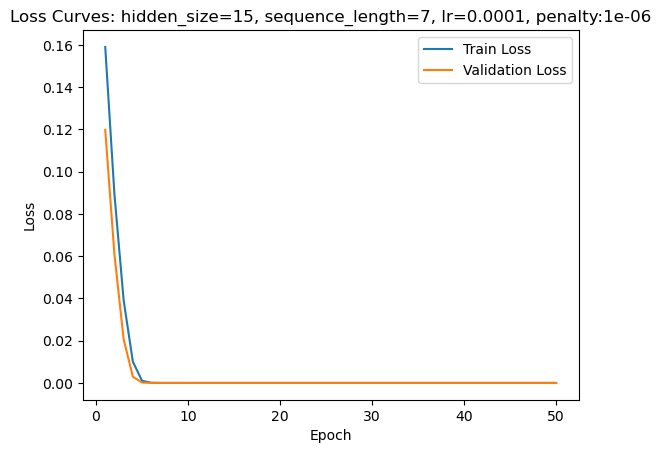

Running experiment: hidden_size=15, sequence_length=7, lr=1e-05, penalty:1e-05


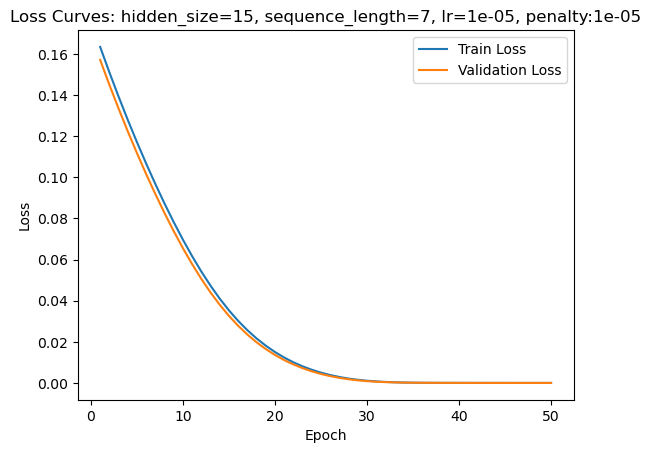

Running experiment: hidden_size=15, sequence_length=7, lr=1e-05, penalty:5e-06


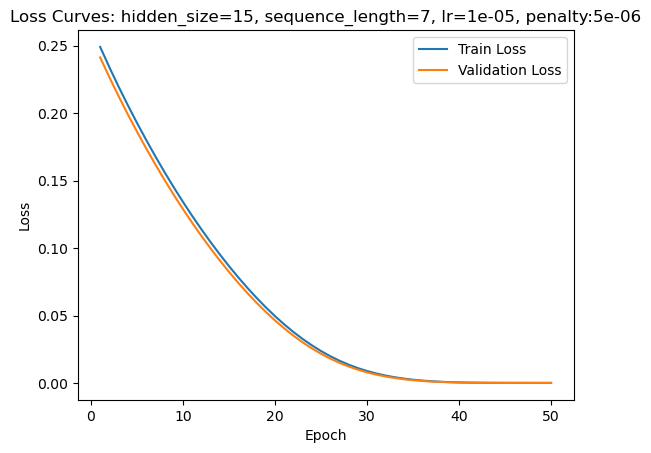

Running experiment: hidden_size=15, sequence_length=7, lr=1e-05, penalty:1e-06


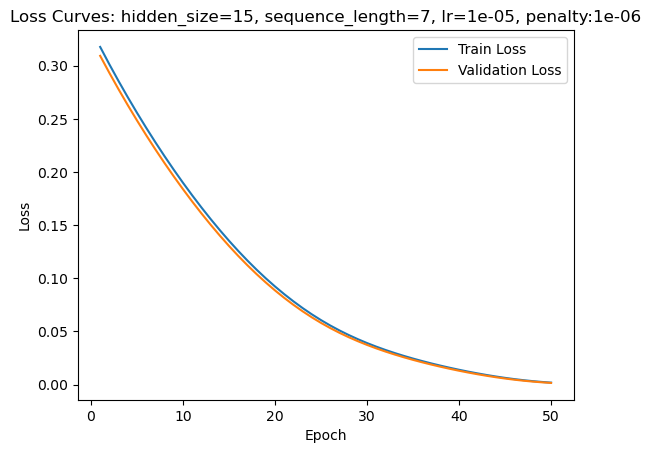

Running experiment: hidden_size=15, sequence_length=14, lr=0.001, penalty:1e-05


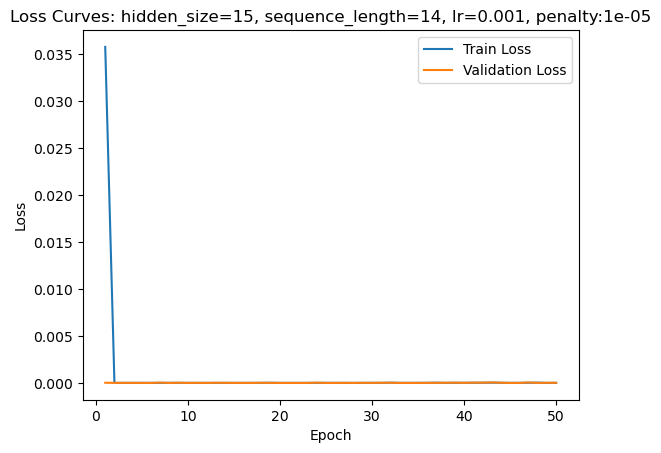

Running experiment: hidden_size=15, sequence_length=14, lr=0.001, penalty:5e-06


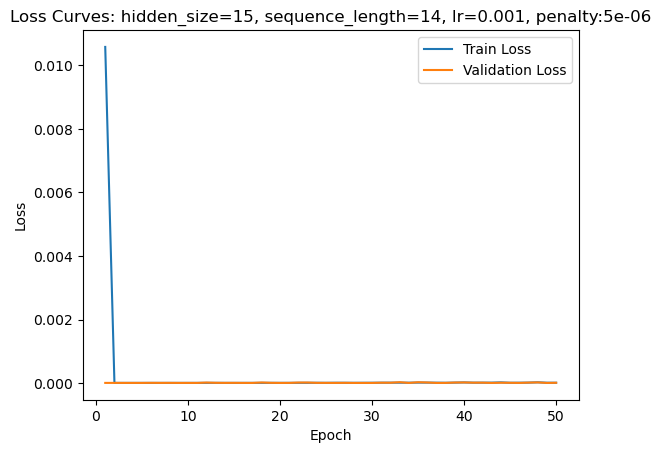

Running experiment: hidden_size=15, sequence_length=14, lr=0.001, penalty:1e-06


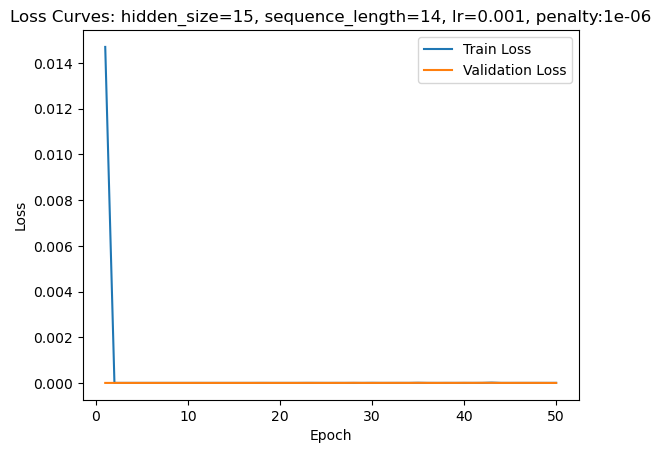

Running experiment: hidden_size=15, sequence_length=14, lr=0.0001, penalty:1e-05


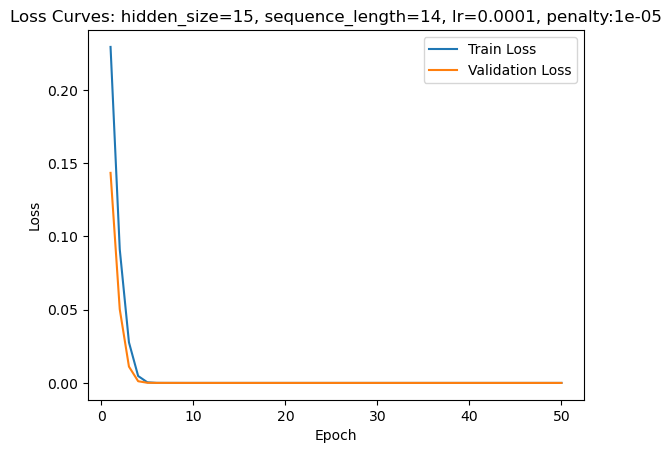

Running experiment: hidden_size=15, sequence_length=14, lr=0.0001, penalty:5e-06


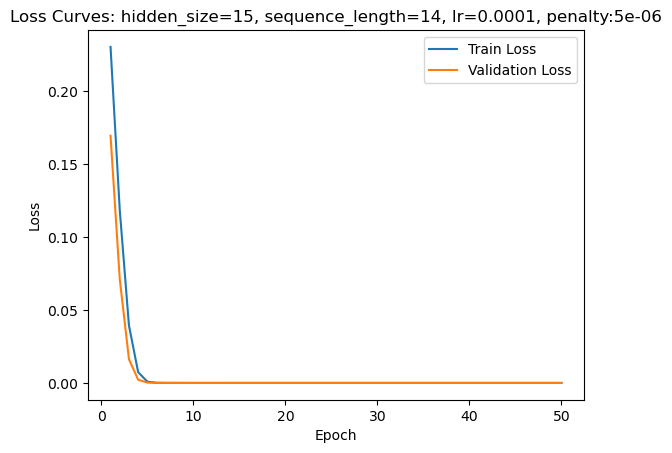

Running experiment: hidden_size=15, sequence_length=14, lr=0.0001, penalty:1e-06


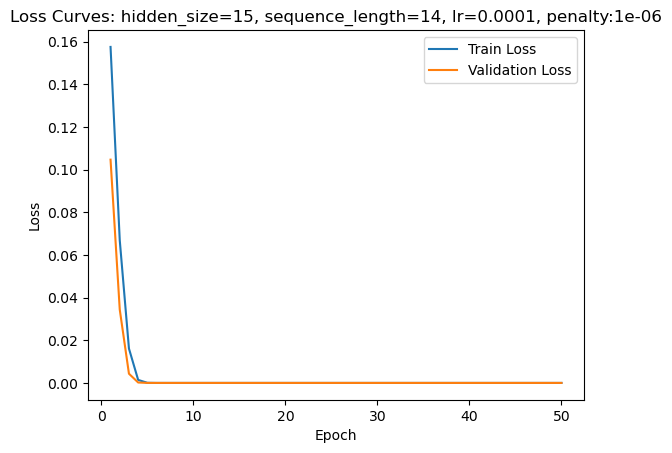

Running experiment: hidden_size=15, sequence_length=14, lr=1e-05, penalty:1e-05


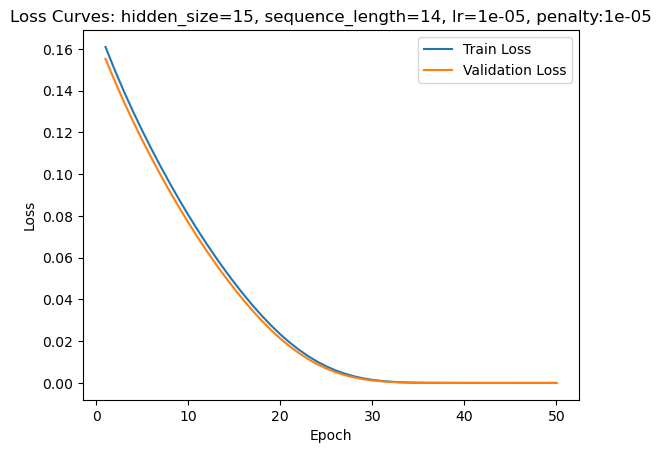

Running experiment: hidden_size=15, sequence_length=14, lr=1e-05, penalty:5e-06


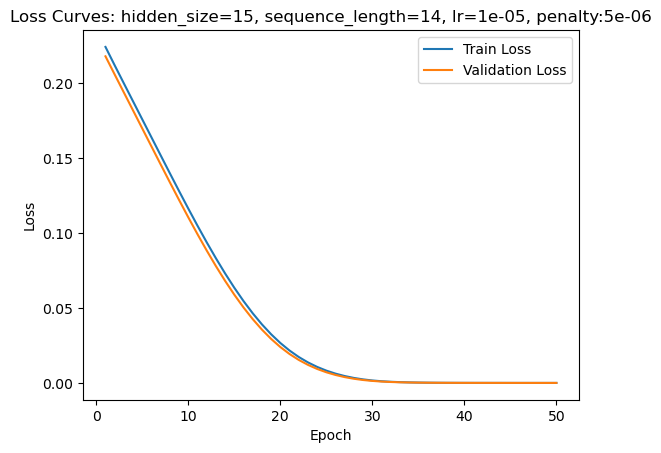

Running experiment: hidden_size=15, sequence_length=14, lr=1e-05, penalty:1e-06


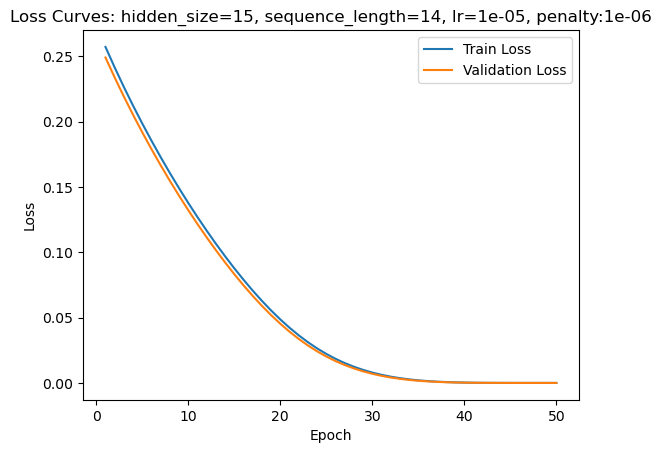

Running experiment: hidden_size=15, sequence_length=35, lr=0.001, penalty:1e-05


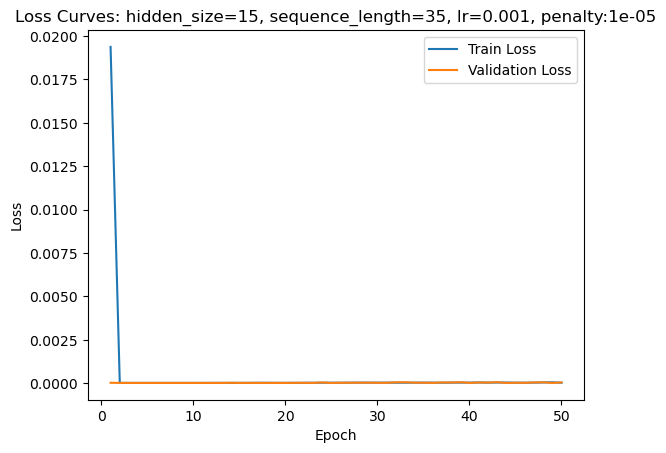

Running experiment: hidden_size=15, sequence_length=35, lr=0.001, penalty:5e-06


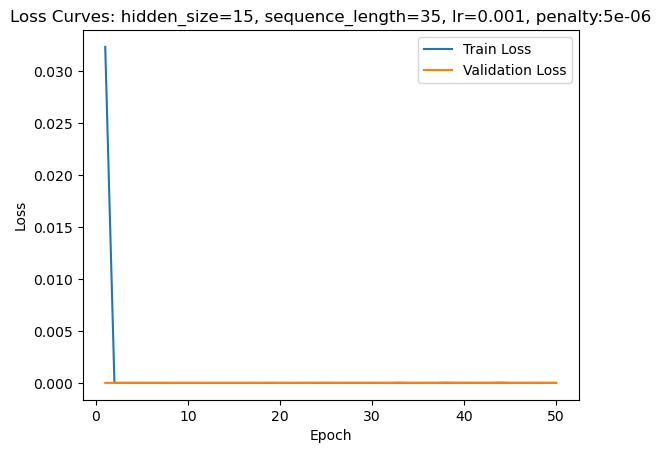

Running experiment: hidden_size=15, sequence_length=35, lr=0.001, penalty:1e-06


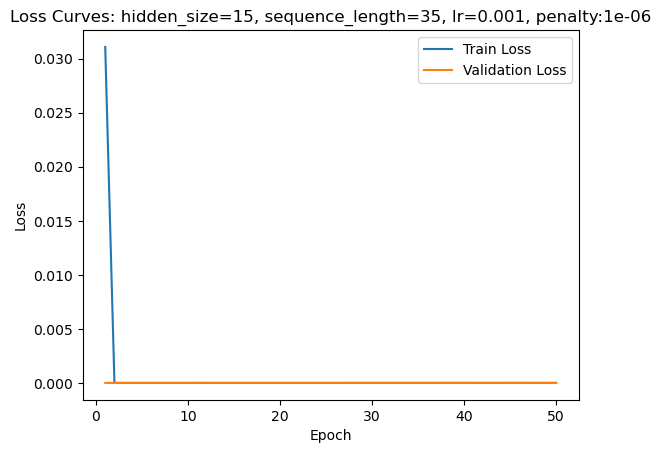

Running experiment: hidden_size=15, sequence_length=35, lr=0.0001, penalty:1e-05


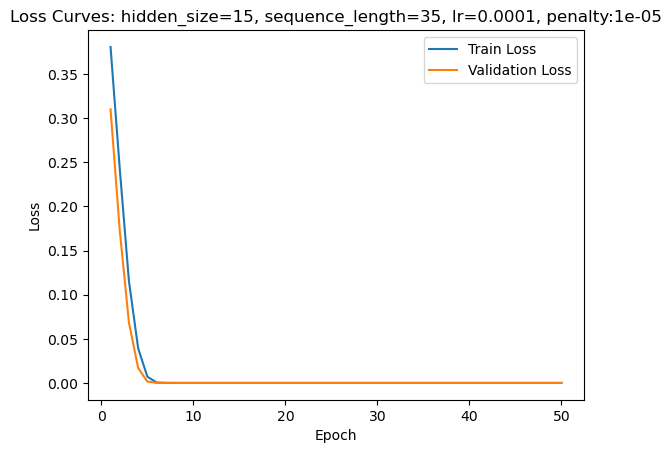

Running experiment: hidden_size=15, sequence_length=35, lr=0.0001, penalty:5e-06


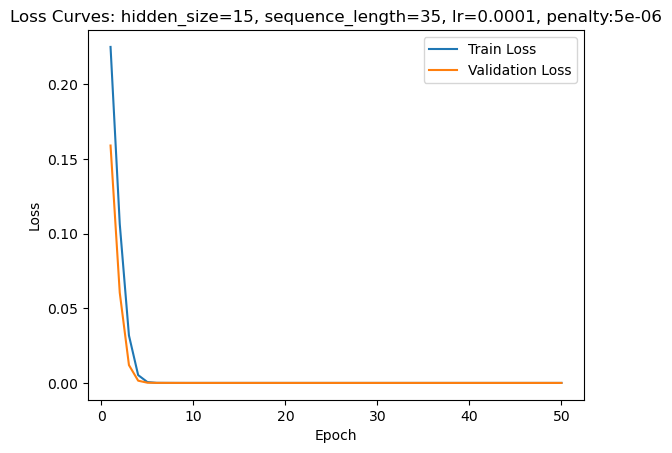

Running experiment: hidden_size=15, sequence_length=35, lr=0.0001, penalty:1e-06


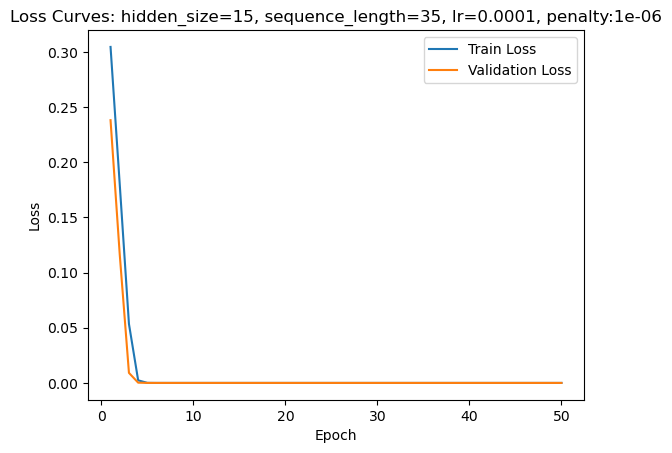

Running experiment: hidden_size=15, sequence_length=35, lr=1e-05, penalty:1e-05


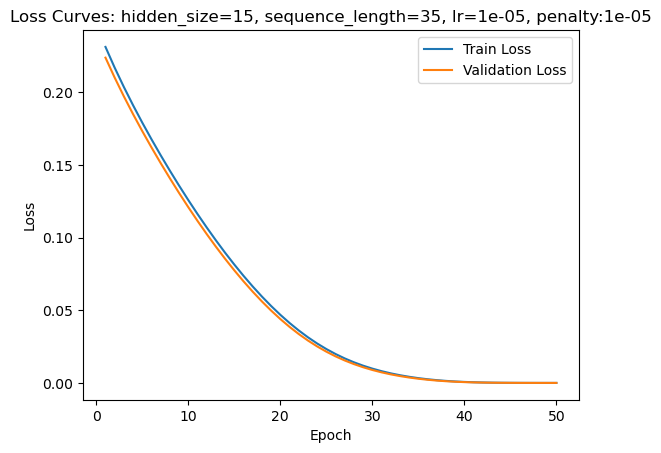

Running experiment: hidden_size=15, sequence_length=35, lr=1e-05, penalty:5e-06


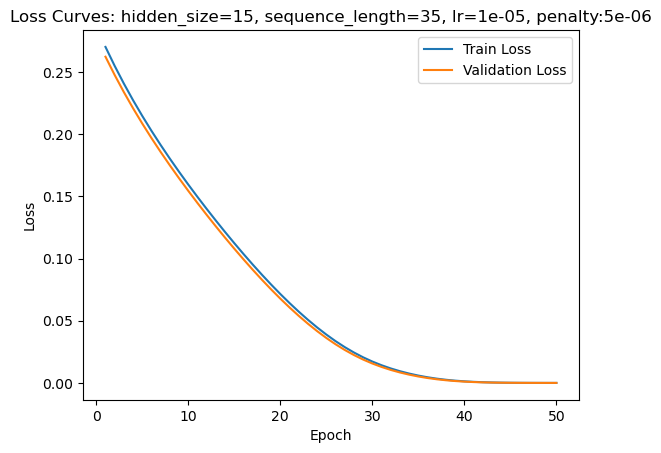

Running experiment: hidden_size=15, sequence_length=35, lr=1e-05, penalty:1e-06


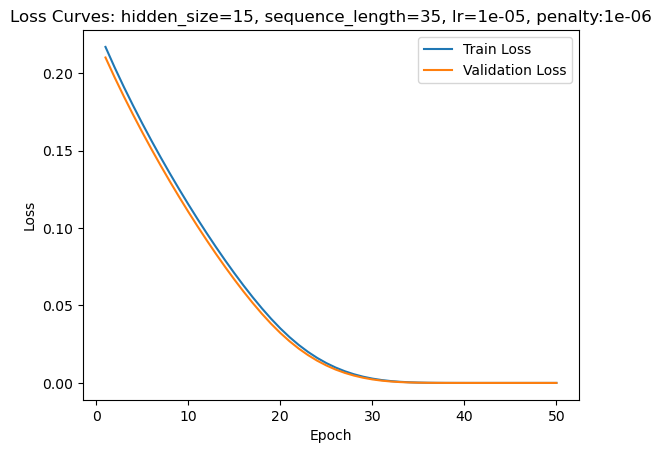

Running experiment: hidden_size=32, sequence_length=7, lr=0.001, penalty:1e-05


Running experiment: hidden_size=32, sequence_length=7, lr=0.001, penalty:5e-06


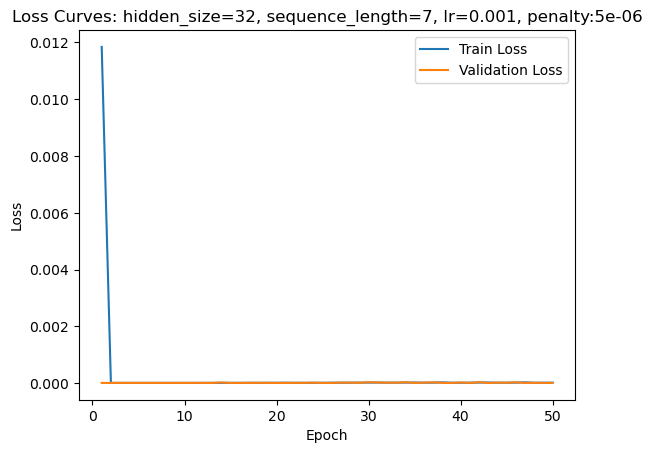

Running experiment: hidden_size=32, sequence_length=7, lr=0.001, penalty:1e-06


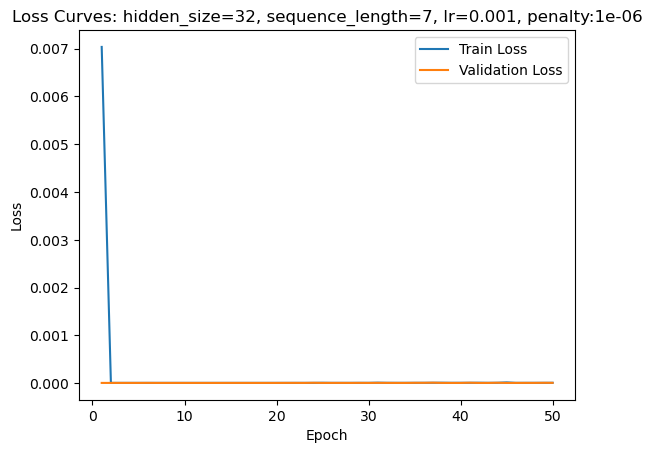

Running experiment: hidden_size=32, sequence_length=7, lr=0.0001, penalty:1e-05


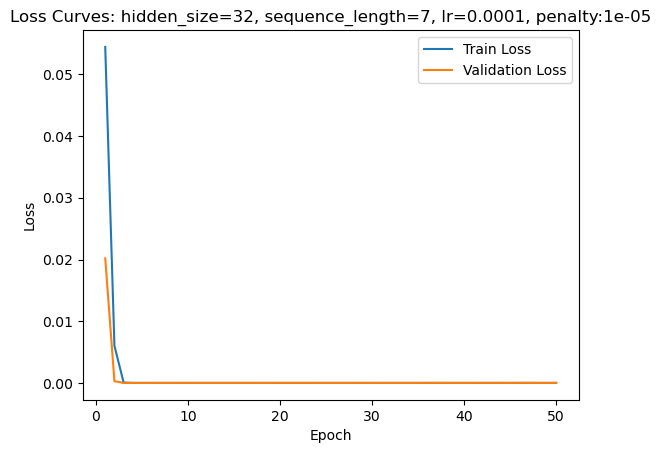

Running experiment: hidden_size=32, sequence_length=7, lr=0.0001, penalty:5e-06


Running experiment: hidden_size=32, sequence_length=7, lr=0.0001, penalty:1e-06


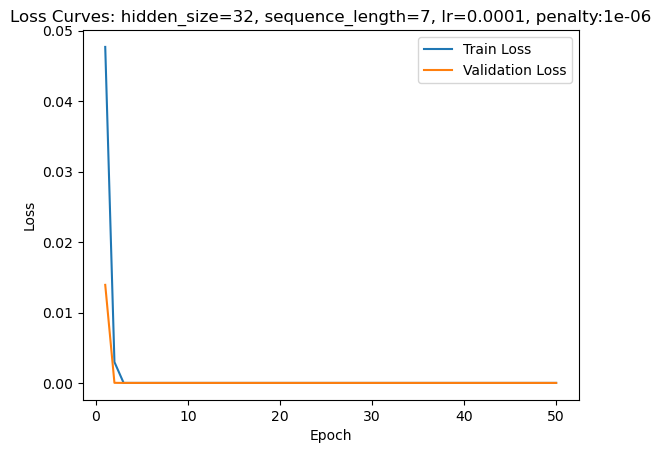

Running experiment: hidden_size=32, sequence_length=7, lr=1e-05, penalty:1e-05


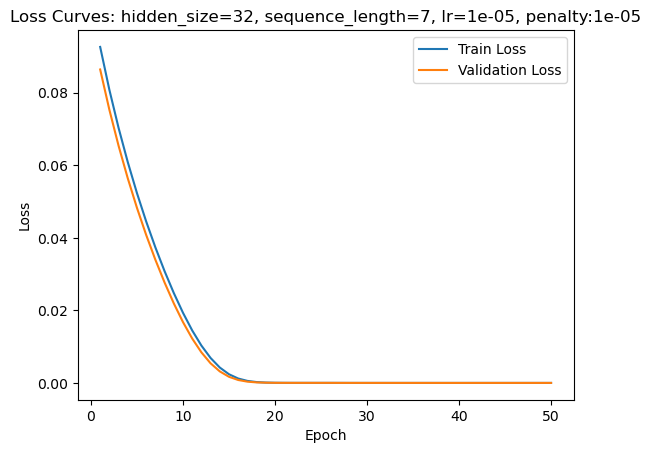

Running experiment: hidden_size=32, sequence_length=7, lr=1e-05, penalty:5e-06


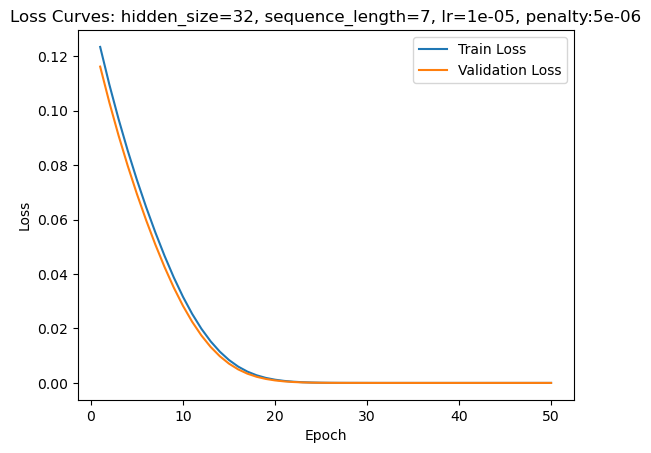

Running experiment: hidden_size=32, sequence_length=7, lr=1e-05, penalty:1e-06


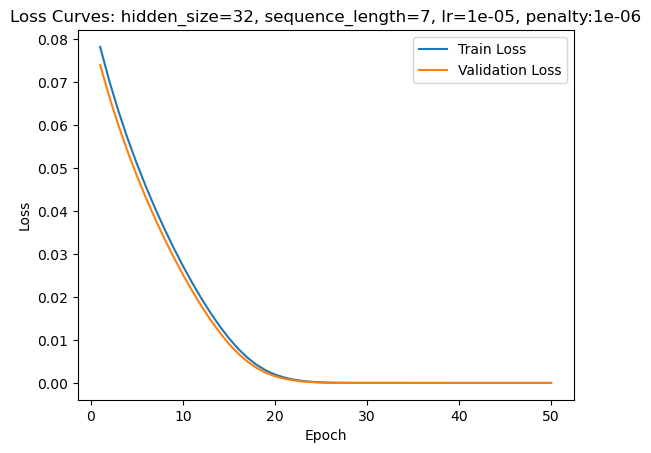

Running experiment: hidden_size=32, sequence_length=14, lr=0.001, penalty:1e-05


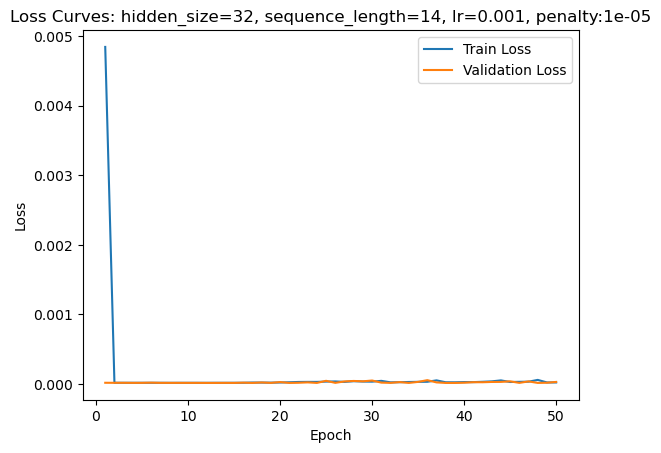

Running experiment: hidden_size=32, sequence_length=14, lr=0.001, penalty:5e-06


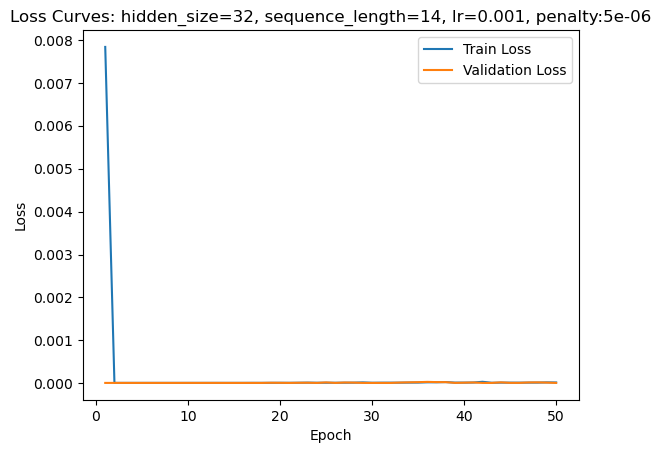

Running experiment: hidden_size=32, sequence_length=14, lr=0.001, penalty:1e-06


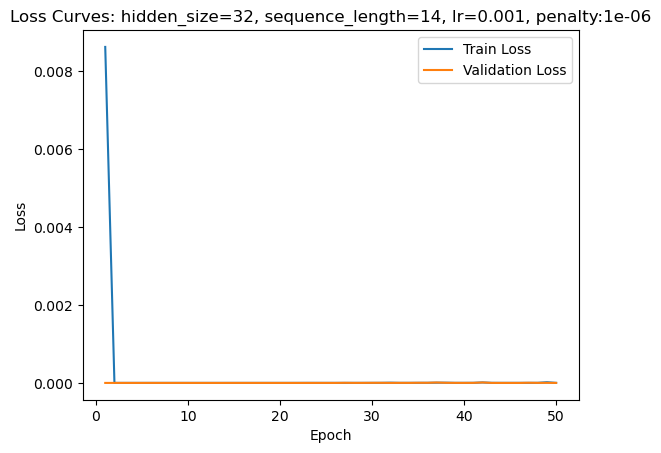

Running experiment: hidden_size=32, sequence_length=14, lr=0.0001, penalty:1e-05


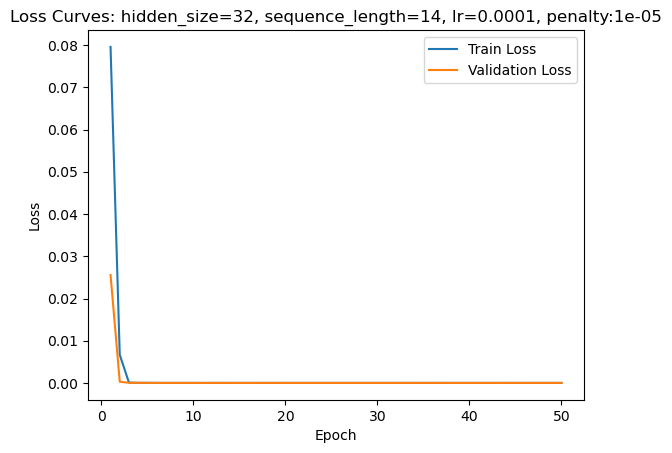

Running experiment: hidden_size=32, sequence_length=14, lr=0.0001, penalty:5e-06


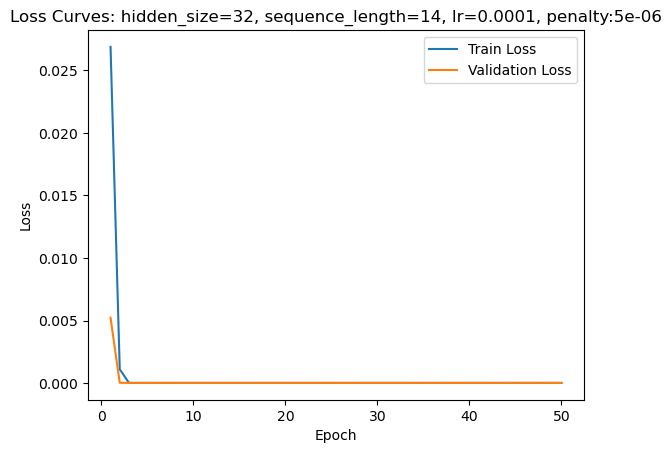

Running experiment: hidden_size=32, sequence_length=14, lr=0.0001, penalty:1e-06


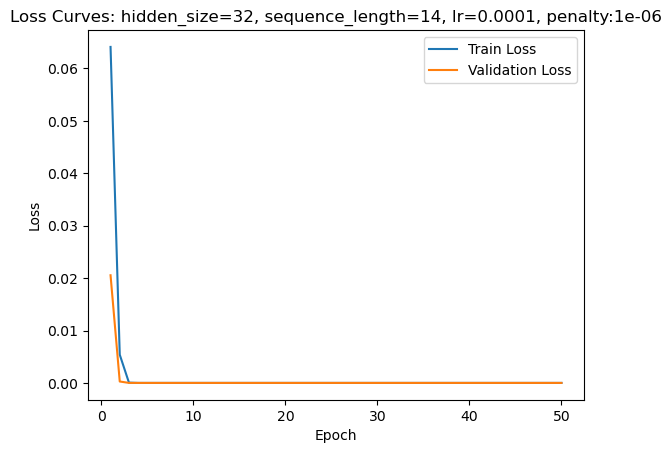

Running experiment: hidden_size=32, sequence_length=14, lr=1e-05, penalty:1e-05


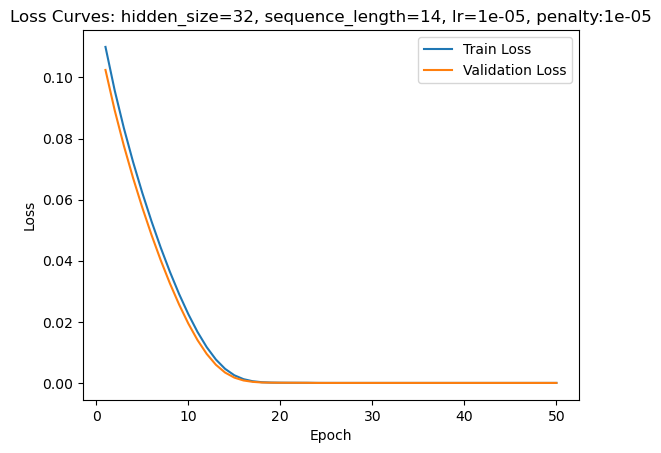

Running experiment: hidden_size=32, sequence_length=14, lr=1e-05, penalty:5e-06


Running experiment: hidden_size=32, sequence_length=14, lr=1e-05, penalty:1e-06


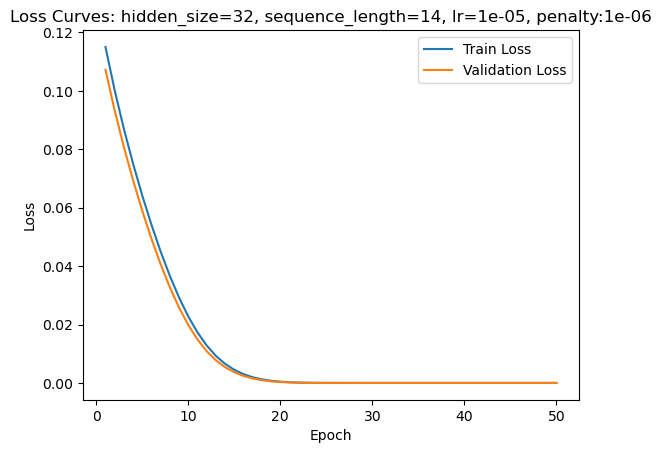

Running experiment: hidden_size=32, sequence_length=35, lr=0.001, penalty:1e-05


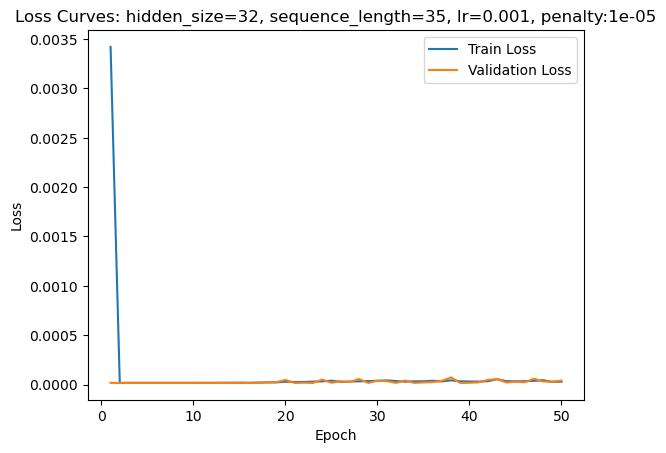

Running experiment: hidden_size=32, sequence_length=35, lr=0.001, penalty:5e-06


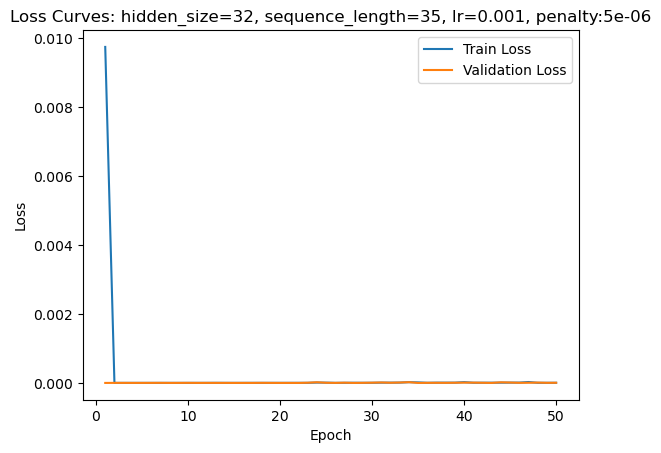

Running experiment: hidden_size=32, sequence_length=35, lr=0.001, penalty:1e-06


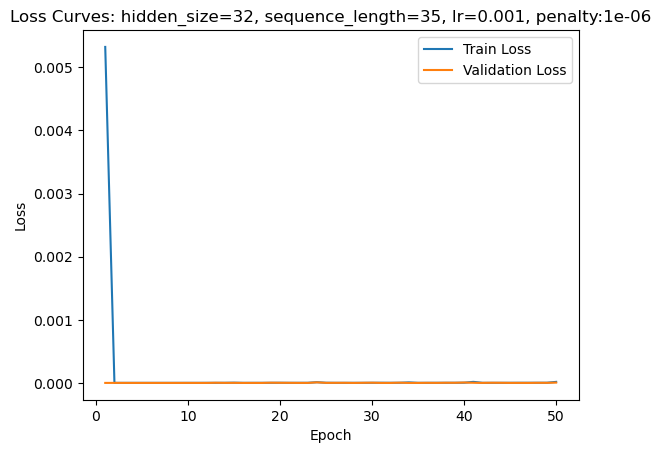

Running experiment: hidden_size=32, sequence_length=35, lr=0.0001, penalty:1e-05


Running experiment: hidden_size=32, sequence_length=35, lr=0.0001, penalty:5e-06


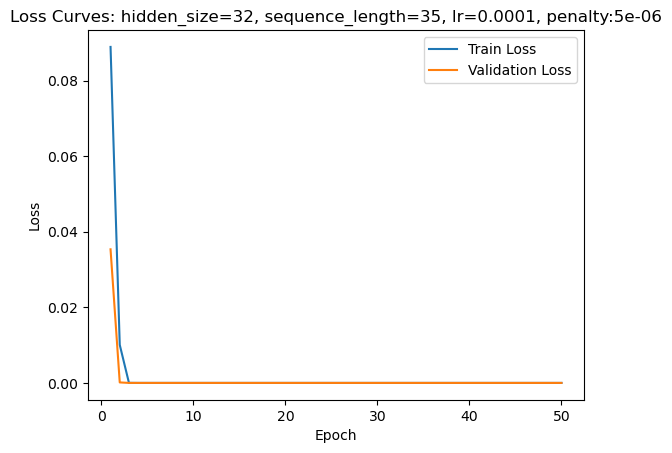

Running experiment: hidden_size=32, sequence_length=35, lr=0.0001, penalty:1e-06


Running experiment: hidden_size=32, sequence_length=35, lr=1e-05, penalty:1e-05


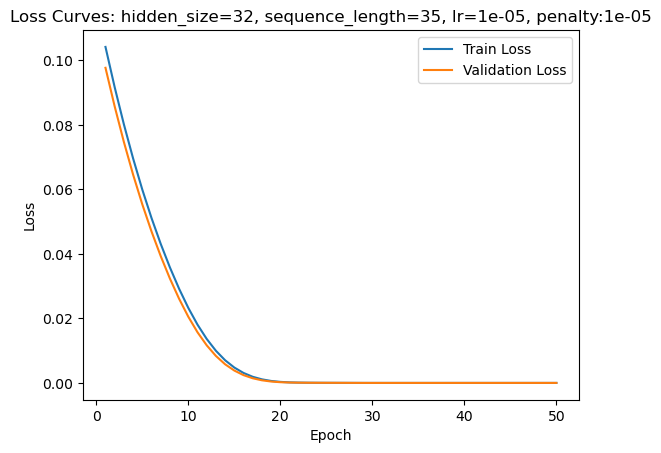

Running experiment: hidden_size=32, sequence_length=35, lr=1e-05, penalty:5e-06


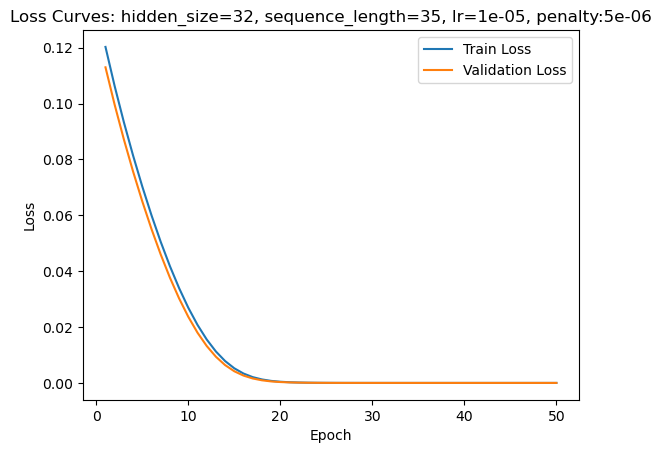

Running experiment: hidden_size=32, sequence_length=35, lr=1e-05, penalty:1e-06


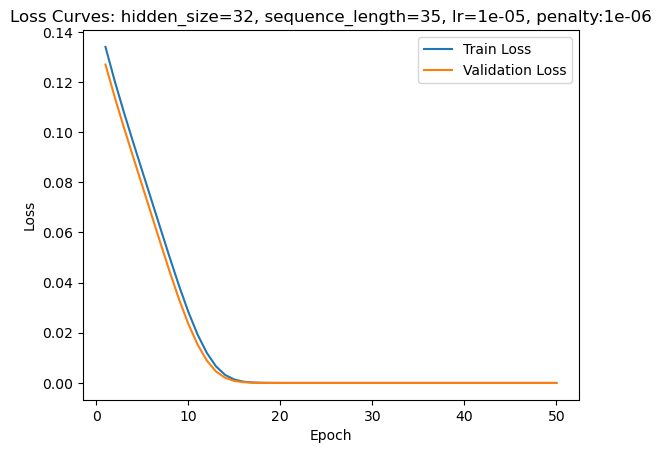

Running experiment: hidden_size=64, sequence_length=7, lr=0.001, penalty:1e-05


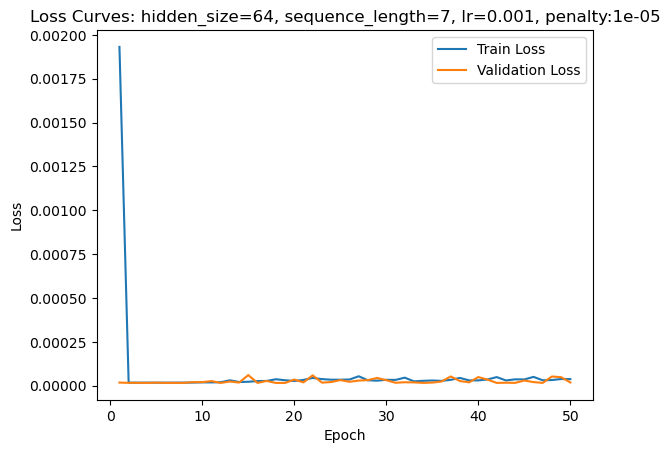

Running experiment: hidden_size=64, sequence_length=7, lr=0.001, penalty:5e-06


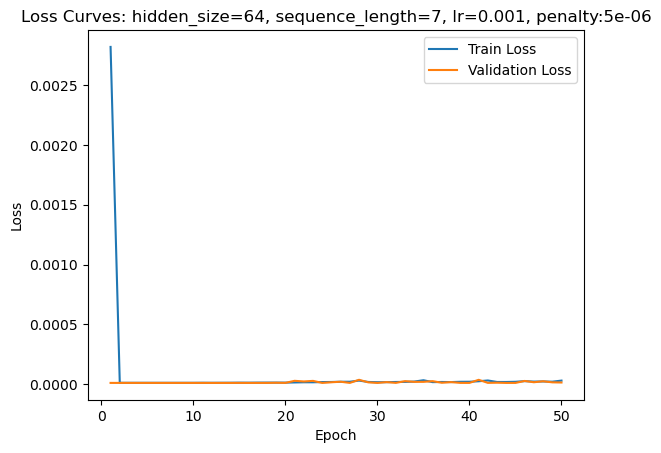

Running experiment: hidden_size=64, sequence_length=7, lr=0.001, penalty:1e-06


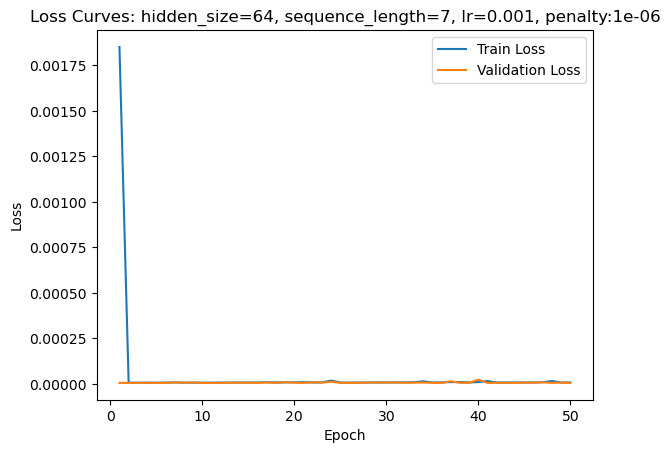

Running experiment: hidden_size=64, sequence_length=7, lr=0.0001, penalty:1e-05


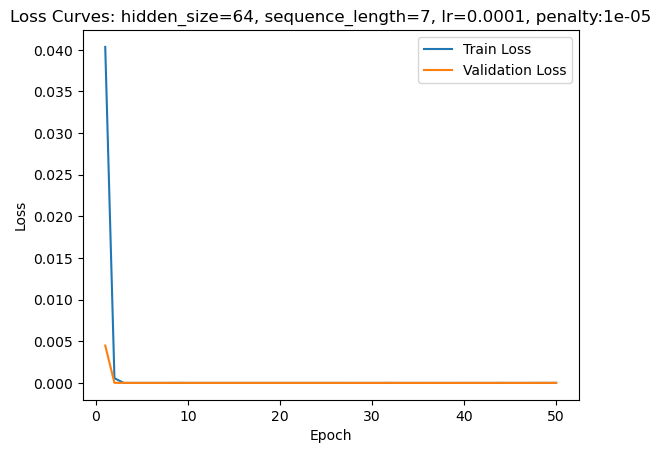

Running experiment: hidden_size=64, sequence_length=7, lr=0.0001, penalty:5e-06


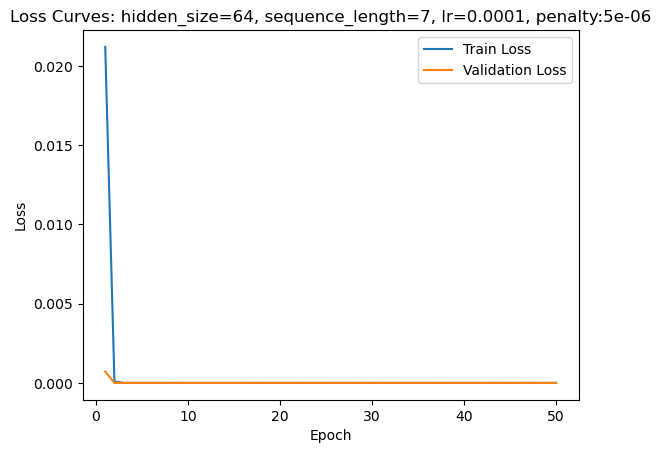

Running experiment: hidden_size=64, sequence_length=7, lr=0.0001, penalty:1e-06


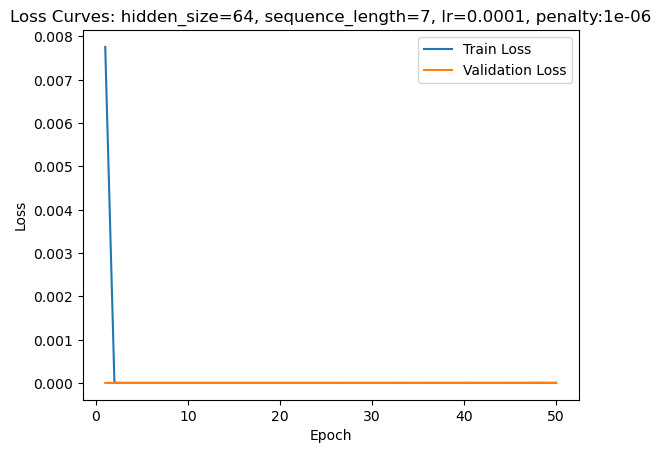

Running experiment: hidden_size=64, sequence_length=7, lr=1e-05, penalty:1e-05


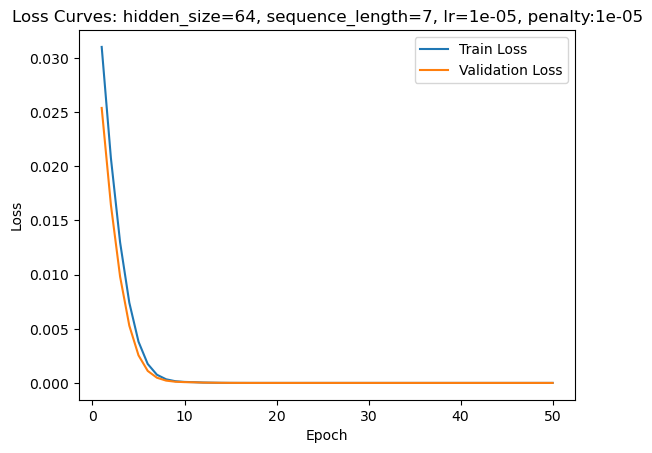

Running experiment: hidden_size=64, sequence_length=7, lr=1e-05, penalty:5e-06


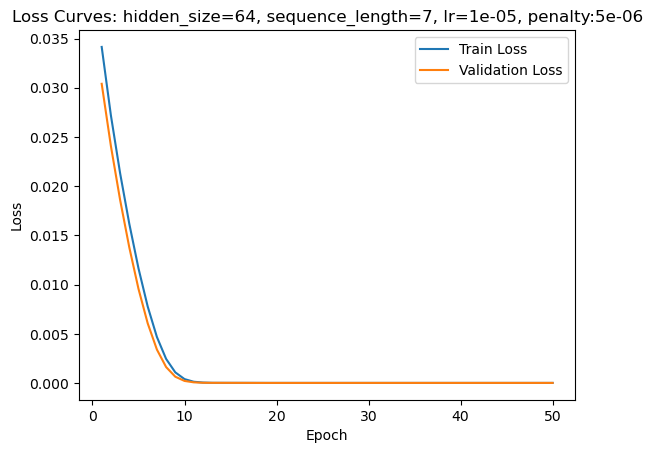

Running experiment: hidden_size=64, sequence_length=7, lr=1e-05, penalty:1e-06


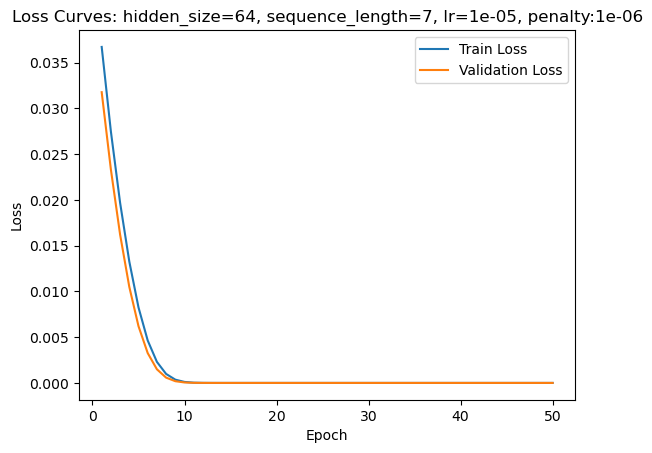

Running experiment: hidden_size=64, sequence_length=14, lr=0.001, penalty:1e-05


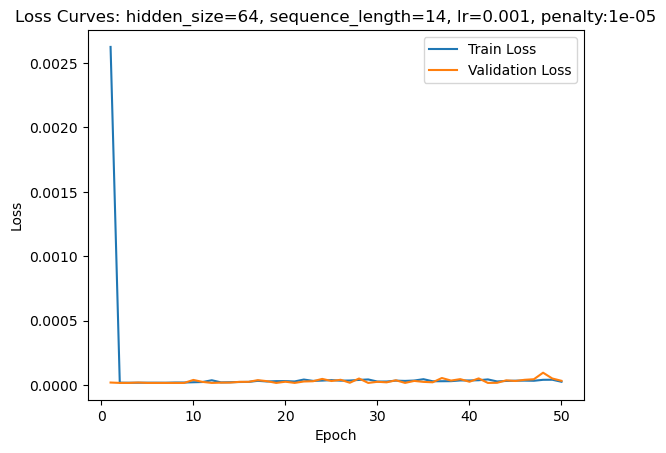

Running experiment: hidden_size=64, sequence_length=14, lr=0.001, penalty:5e-06


Running experiment: hidden_size=64, sequence_length=14, lr=0.001, penalty:1e-06


Running experiment: hidden_size=64, sequence_length=14, lr=0.0001, penalty:1e-05


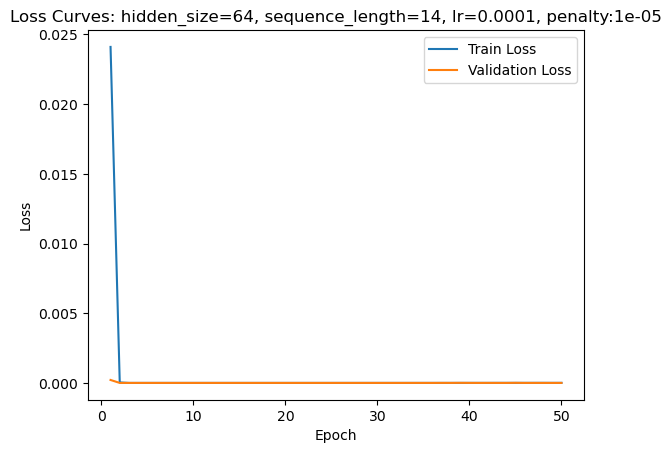

Running experiment: hidden_size=64, sequence_length=14, lr=0.0001, penalty:5e-06


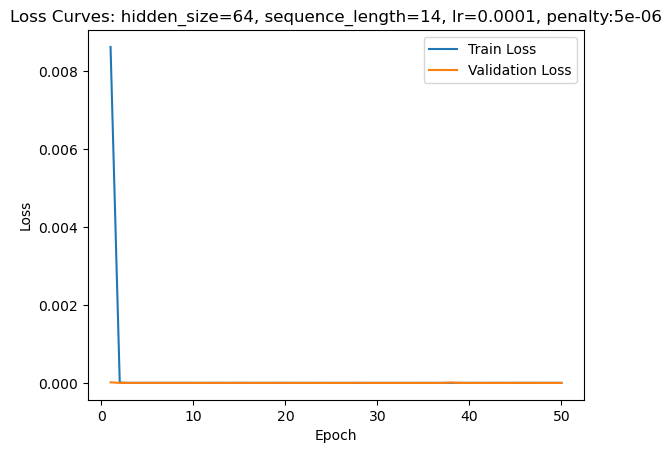

Running experiment: hidden_size=64, sequence_length=14, lr=0.0001, penalty:1e-06


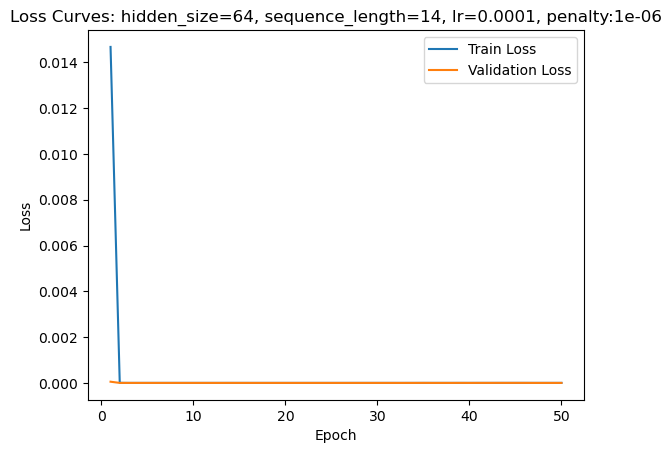

Running experiment: hidden_size=64, sequence_length=14, lr=1e-05, penalty:1e-05


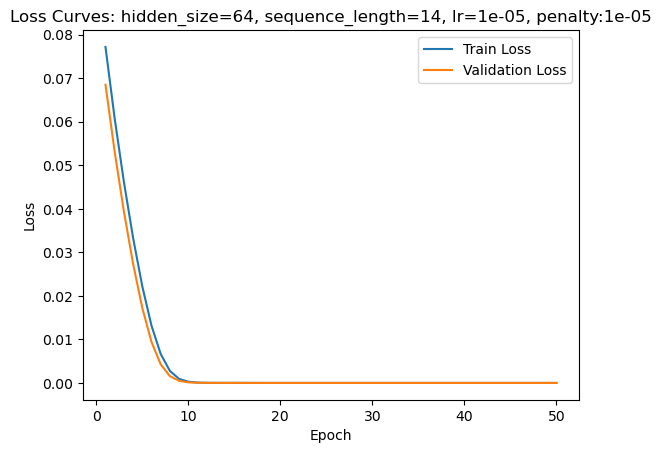

Running experiment: hidden_size=64, sequence_length=14, lr=1e-05, penalty:5e-06


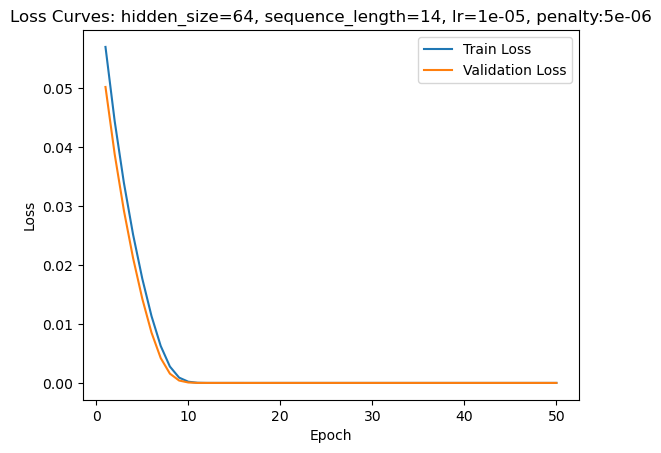

Running experiment: hidden_size=64, sequence_length=14, lr=1e-05, penalty:1e-06


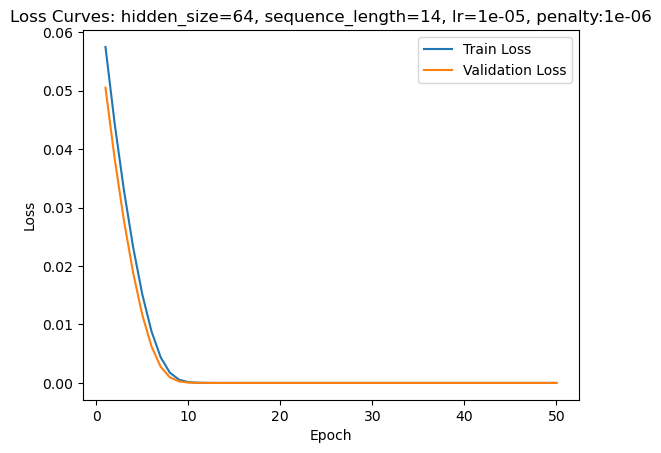

Running experiment: hidden_size=64, sequence_length=35, lr=0.001, penalty:1e-05


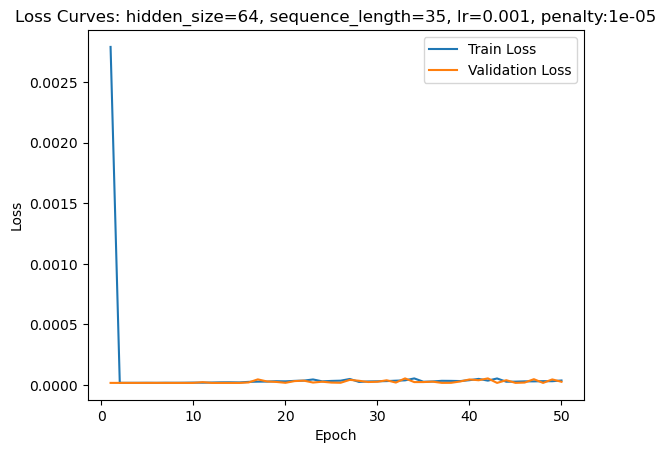

Running experiment: hidden_size=64, sequence_length=35, lr=0.001, penalty:5e-06


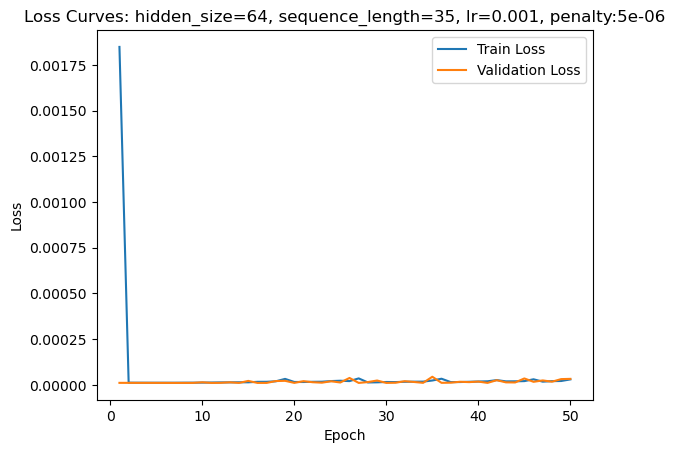

Running experiment: hidden_size=64, sequence_length=35, lr=0.001, penalty:1e-06


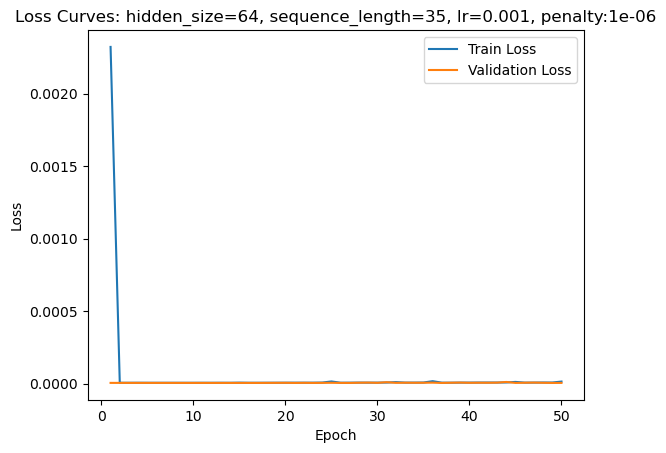

Running experiment: hidden_size=64, sequence_length=35, lr=0.0001, penalty:1e-05


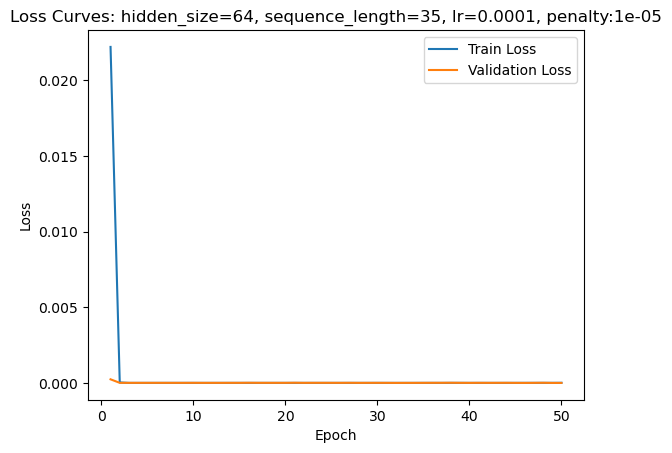

Running experiment: hidden_size=64, sequence_length=35, lr=0.0001, penalty:5e-06


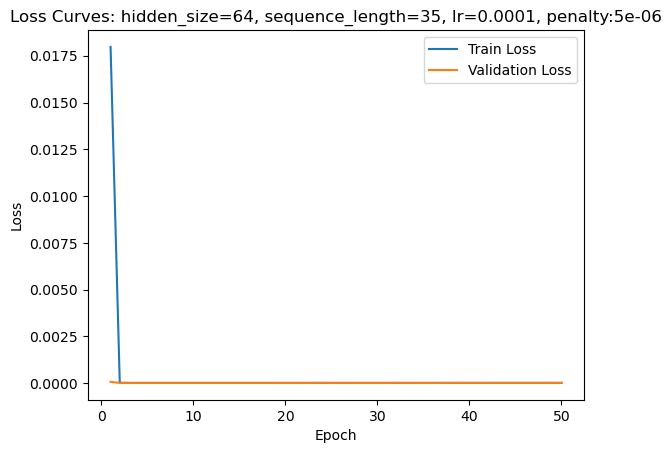

Running experiment: hidden_size=64, sequence_length=35, lr=0.0001, penalty:1e-06


Running experiment: hidden_size=64, sequence_length=35, lr=1e-05, penalty:1e-05


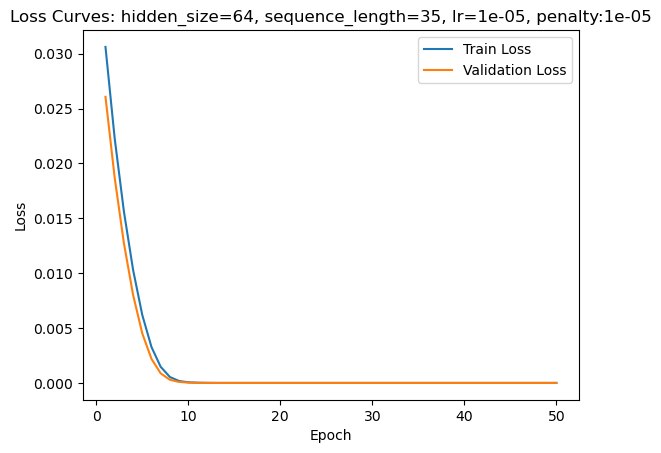

Running experiment: hidden_size=64, sequence_length=35, lr=1e-05, penalty:5e-06


Running experiment: hidden_size=64, sequence_length=35, lr=1e-05, penalty:1e-06


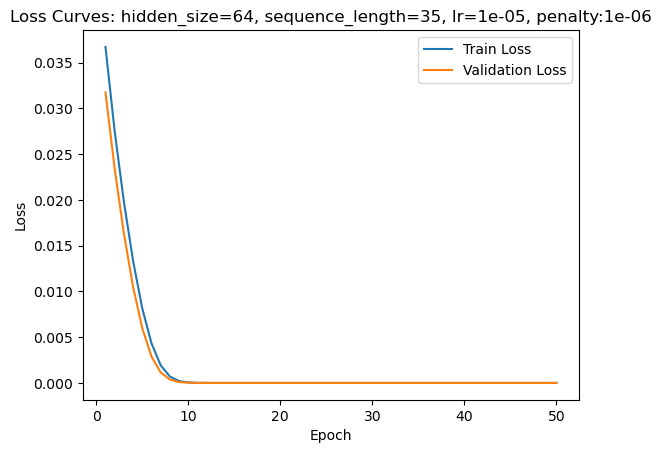

Running experiment: hidden_size=128, sequence_length=7, lr=0.001, penalty:1e-05


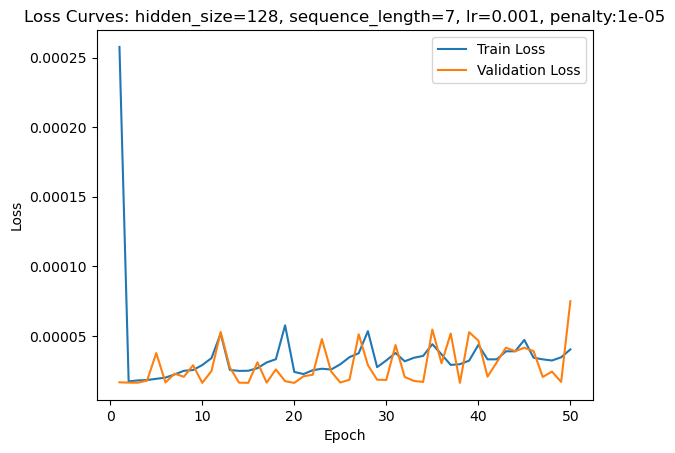

Running experiment: hidden_size=128, sequence_length=7, lr=0.001, penalty:5e-06


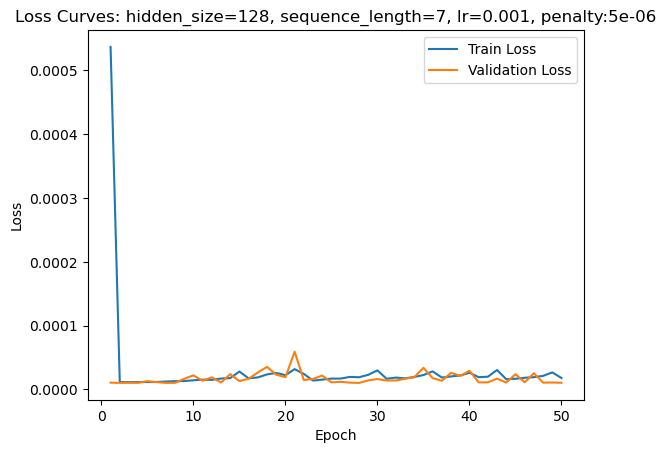

Running experiment: hidden_size=128, sequence_length=7, lr=0.001, penalty:1e-06


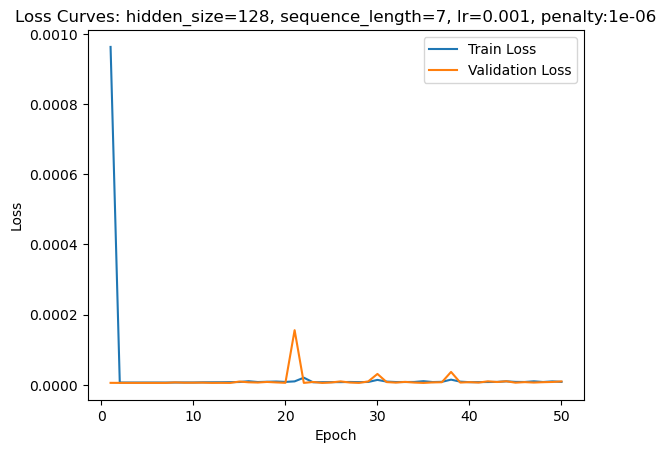

Running experiment: hidden_size=128, sequence_length=7, lr=0.0001, penalty:1e-05


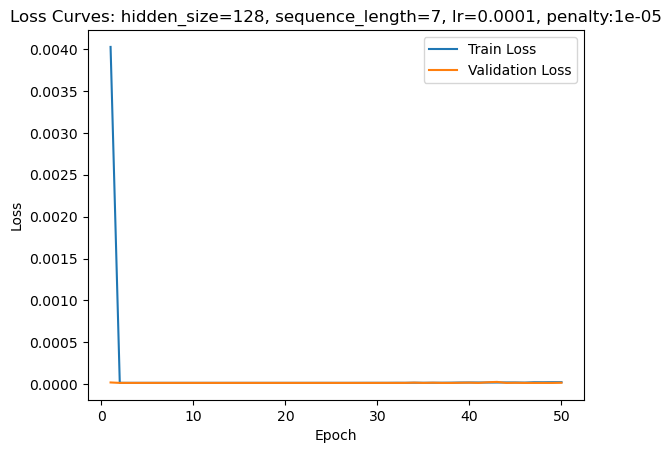

Running experiment: hidden_size=128, sequence_length=7, lr=0.0001, penalty:5e-06


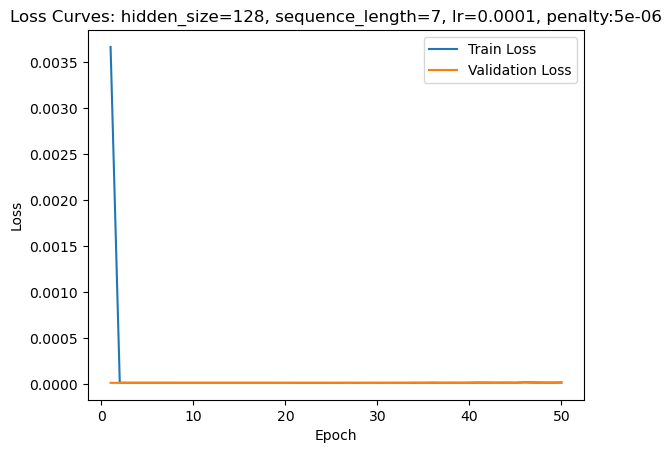

Running experiment: hidden_size=128, sequence_length=7, lr=0.0001, penalty:1e-06


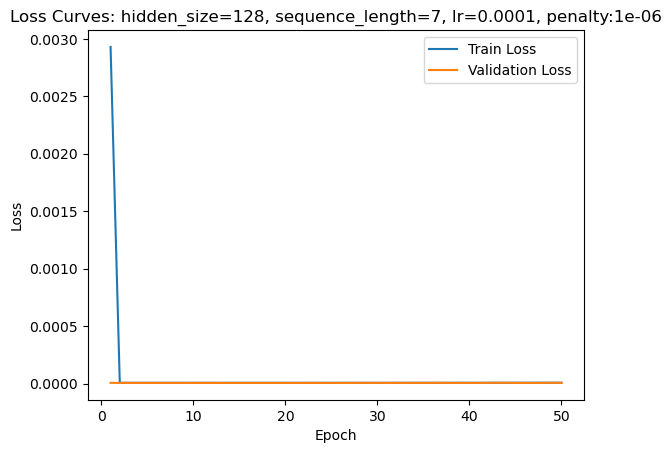

Running experiment: hidden_size=128, sequence_length=7, lr=1e-05, penalty:1e-05


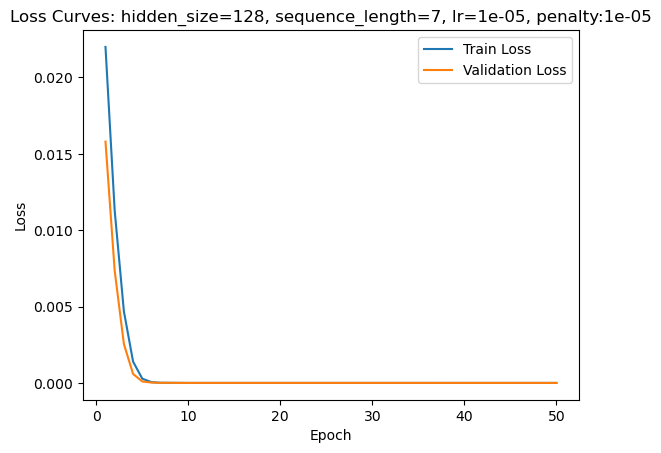

Running experiment: hidden_size=128, sequence_length=7, lr=1e-05, penalty:5e-06


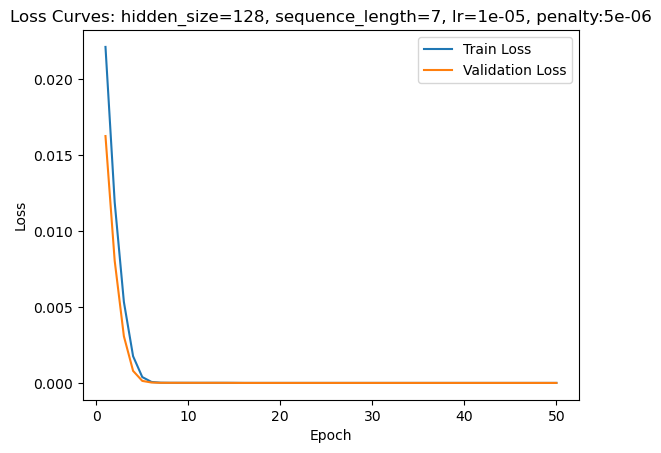

Running experiment: hidden_size=128, sequence_length=7, lr=1e-05, penalty:1e-06


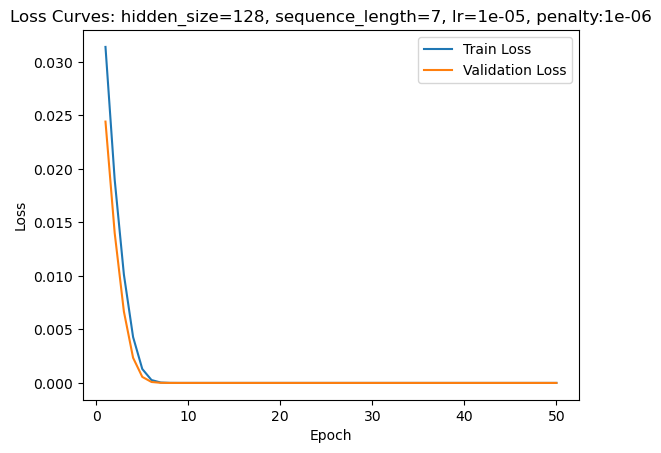

Running experiment: hidden_size=128, sequence_length=14, lr=0.001, penalty:1e-05


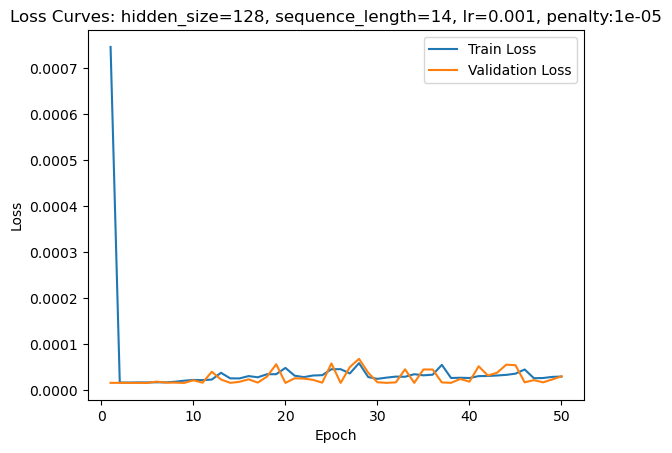

Running experiment: hidden_size=128, sequence_length=14, lr=0.001, penalty:5e-06


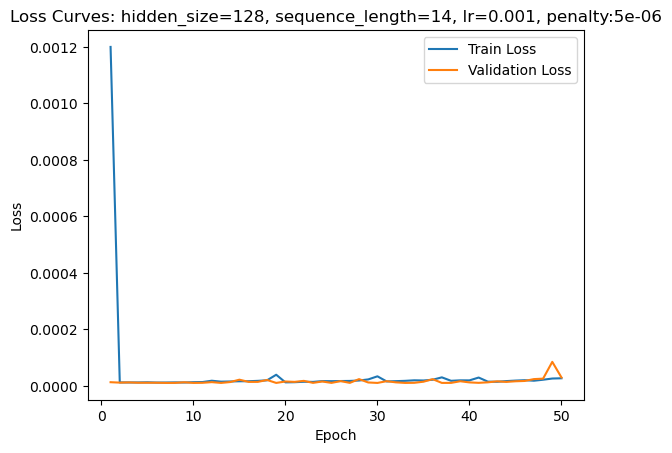

Running experiment: hidden_size=128, sequence_length=14, lr=0.001, penalty:1e-06


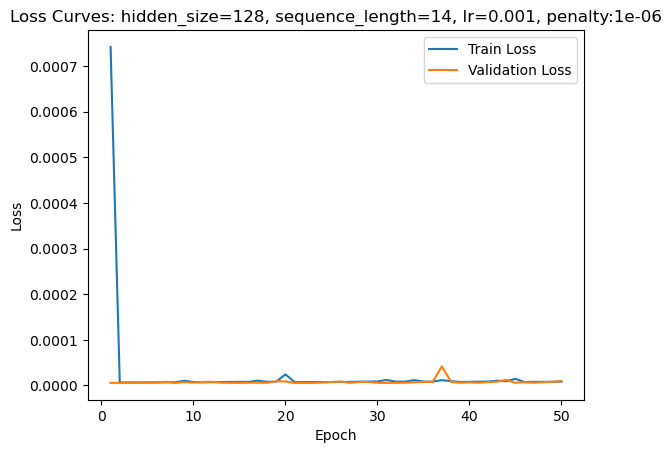

Running experiment: hidden_size=128, sequence_length=14, lr=0.0001, penalty:1e-05


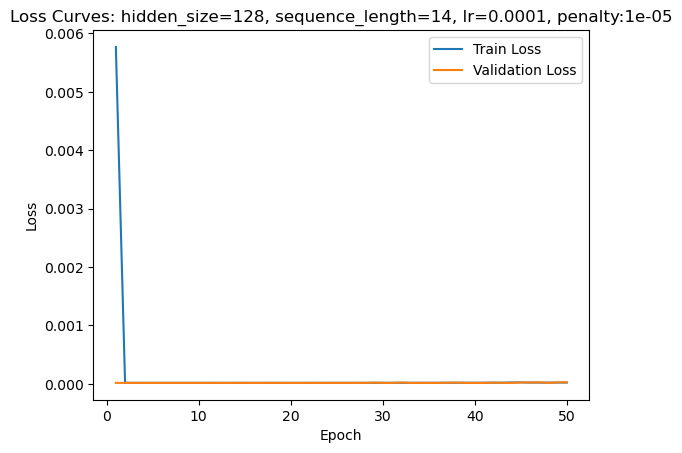

Running experiment: hidden_size=128, sequence_length=14, lr=0.0001, penalty:5e-06


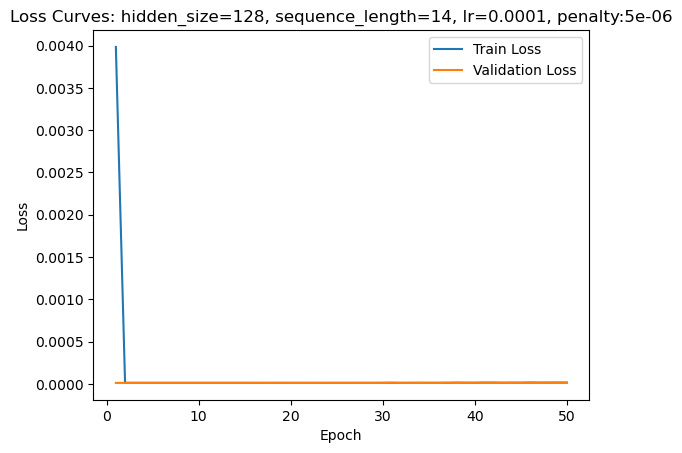

Running experiment: hidden_size=128, sequence_length=14, lr=0.0001, penalty:1e-06


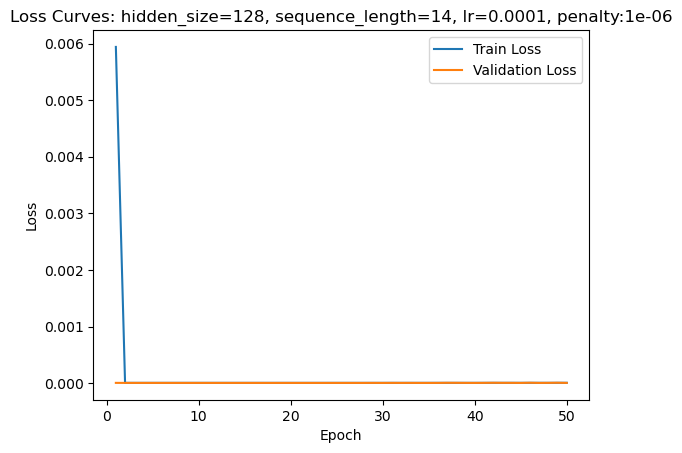

Running experiment: hidden_size=128, sequence_length=14, lr=1e-05, penalty:1e-05


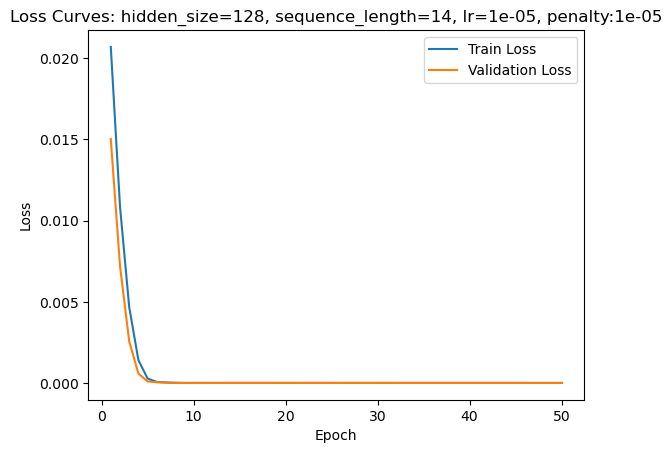

Running experiment: hidden_size=128, sequence_length=14, lr=1e-05, penalty:5e-06


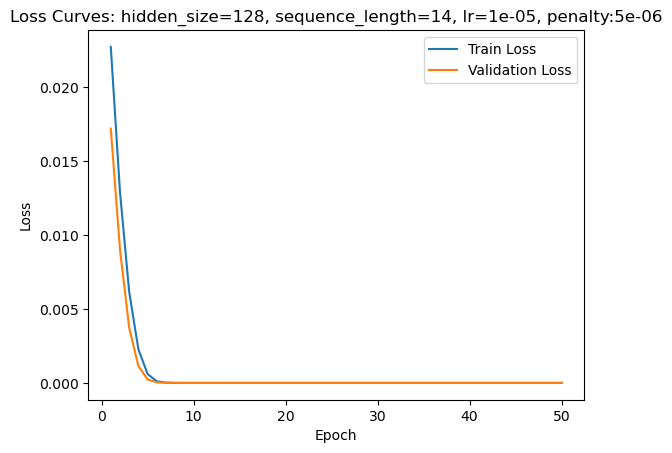

Running experiment: hidden_size=128, sequence_length=14, lr=1e-05, penalty:1e-06


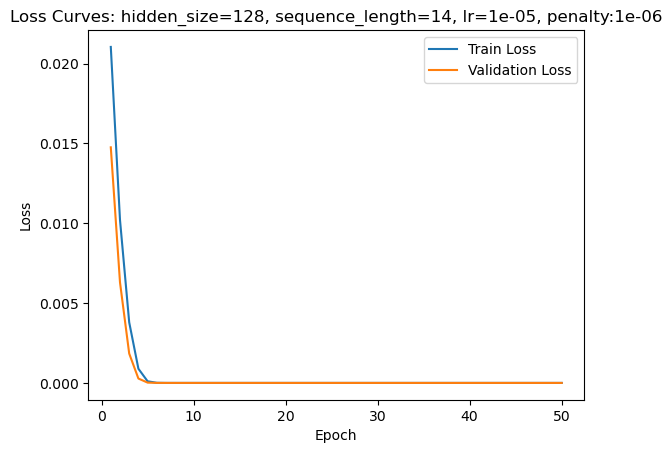

Running experiment: hidden_size=128, sequence_length=35, lr=0.001, penalty:1e-05


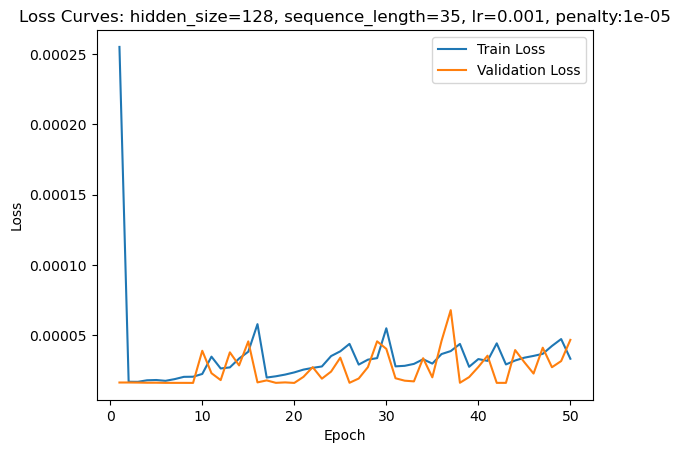

Running experiment: hidden_size=128, sequence_length=35, lr=0.001, penalty:5e-06


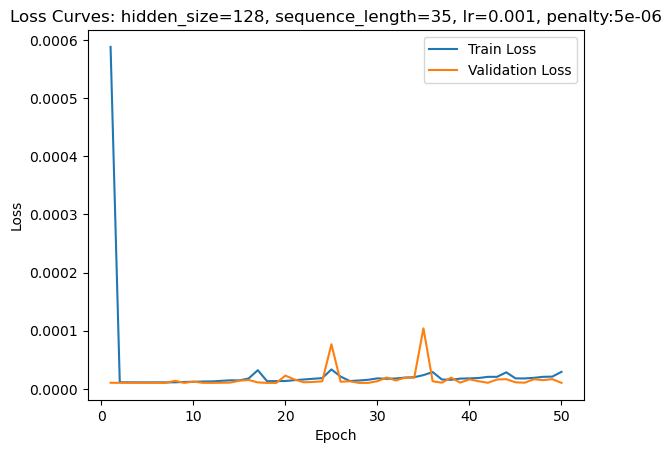

Running experiment: hidden_size=128, sequence_length=35, lr=0.001, penalty:1e-06


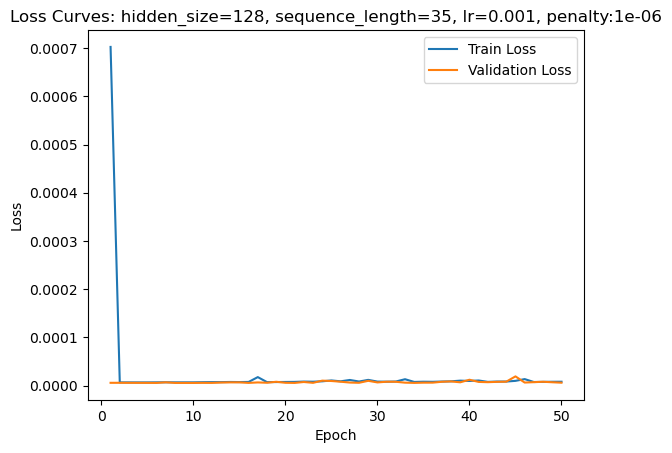

Running experiment: hidden_size=128, sequence_length=35, lr=0.0001, penalty:1e-05


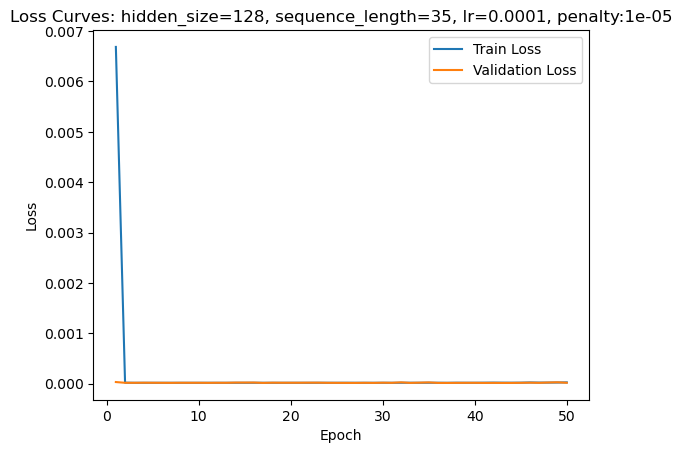

Running experiment: hidden_size=128, sequence_length=35, lr=0.0001, penalty:5e-06


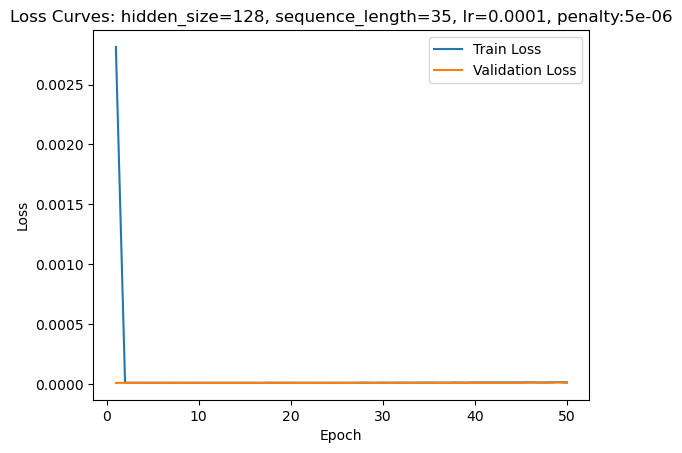

Running experiment: hidden_size=128, sequence_length=35, lr=0.0001, penalty:1e-06


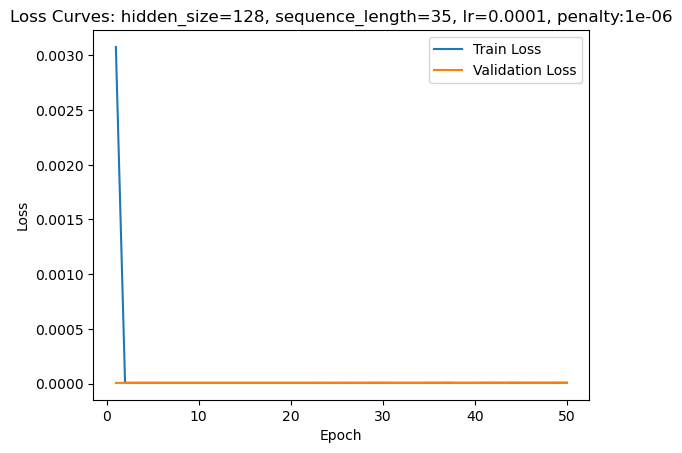

Running experiment: hidden_size=128, sequence_length=35, lr=1e-05, penalty:1e-05


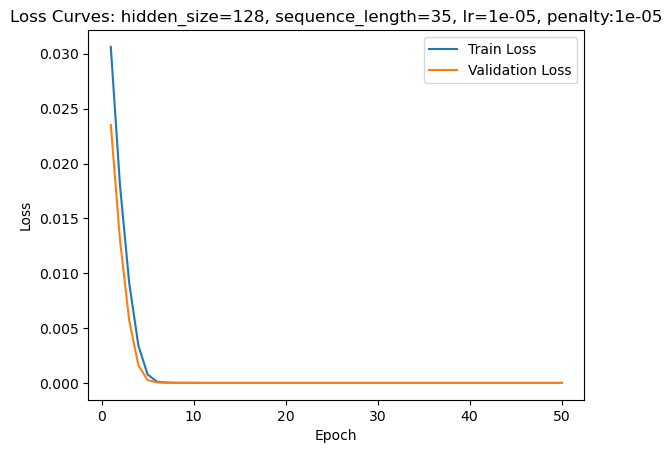

Running experiment: hidden_size=128, sequence_length=35, lr=1e-05, penalty:5e-06


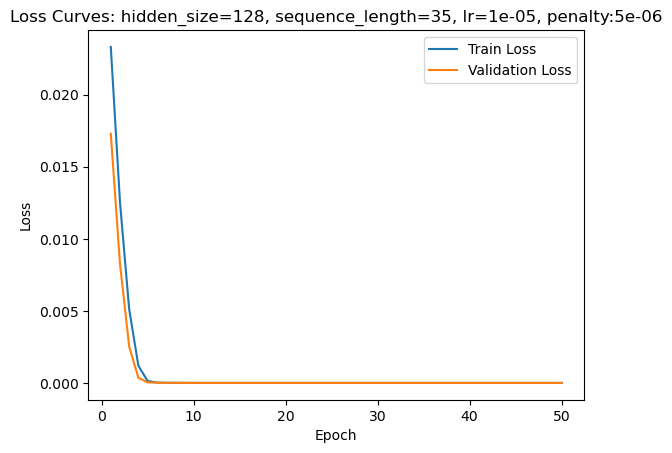

Running experiment: hidden_size=128, sequence_length=35, lr=1e-05, penalty:1e-06


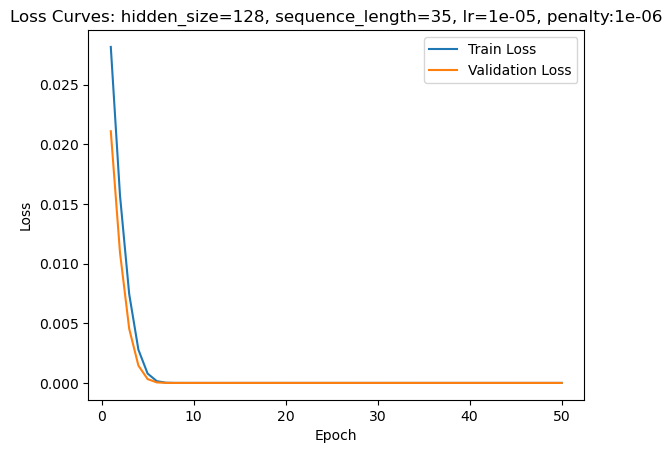

In [50]:
def prepare_data1(data, sequence_length, train_ratio=0.9):
    """
    Split data into training and validation datasets.

    The last `1 - train_ratio` fraction of the data is allocated to the validation set.
    """
    train_size = int(len(data) * train_ratio)
    train_data = data[:train_size]
    val_data = data[train_size:]

    train_dataset = CholeskyDataset(train_data, sequence_length)
    val_dataset = CholeskyDataset(val_data, sequence_length)

    return train_dataset, val_dataset

# Train Function
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs, crit_dict=None):
    if crit_dict is not None:
        cr_values = {}
        for key, cr in crit_dict.items():
            cr_values[key] = []

    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        # Training Loop
        model.train()
        # train_loss = 0
        tr_predictions = []
        tr_targets = []
        for x, y in train_loader:
            optimizer.zero_grad()
            y_pred = model(x)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()
            tr_predictions.append(y_pred)
            tr_targets.append(y)
            # train_loss += loss.item()
        tr_predictions = torch.cat(tr_predictions, dim=0)
        tr_targets = torch.cat(tr_targets, dim=0)
        train_losses.append(criterion(tr_predictions, tr_targets).item())

        # Validation Loop
        model.eval()
        # val_loss = 0
        all_predictions = []
        all_targets = []
        with torch.no_grad():
            for x, y in val_loader:
                y_pred = model(x)
                all_predictions.append(y_pred)
                all_targets.append(y)
                # loss = criterion(y_pred, y)
                # val_loss += loss.item()

        all_predictions = torch.cat(all_predictions, dim=0)
        all_targets = torch.cat(all_targets, dim=0)
        
        val_losses.append(criterion(all_predictions, all_targets).item())

        if crit_dict is not None:
            for key, cr in crit_dict.items():
                 cr_values[key].append(cr(all_predictions, all_targets).item())
    
    return train_losses, val_losses, cr_values

if __name__ == "__main__":
    cholesky_vectors1 = cholesky_vectors[:11264]
    num_epochs = 50
    batch_size = 64

    sequence_lengths = [7, 14, 35]
    hidden_sizes = [15, 32, 64, 128]
    learning_rates = [0.001, 0.0001, 0.00001]
    penalties = [1e-5, 5e-6, 1e-6]
    results = {}

    for hidden_size in hidden_sizes:
        for sequence_length in sequence_lengths:
            for lr in learning_rates:
                for penalty in penalties:
                    print(f"Running experiment: hidden_size={hidden_size}, sequence_length={sequence_length}, lr={lr}, penalty:{penalty}")

                    # Prepare train and validation datasets
                    train_dataset, val_dataset = prepare_data1(cholesky_vectors1, sequence_length)
                    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

                    input_size = cholesky_vectors1.shape[1]
                    output_size = cholesky_vectors1.shape[1]
                    model = CholeskyLSTM(input_size, hidden_size, output_size)
                    criterion = FrobeniusLossWithSignPenalty(lambda_penalty=penalty)
                    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

                    criterion1 = FrobeniusLossWithSignPenalty(lambda_penalty=penalty)
                    criterion2 = FrobeniusLoss()
                    criterion3 = SignAccuracyLoss()

                    crit_dict = {'f_norm':criterion1, 'f_norm_pen':criterion2, 'acc':criterion3}


                    train_losses, val_losses, cr_values = train_and_validate(
                        model, train_loader, val_loader, criterion, optimizer, num_epochs, crit_dict
                    )

                    # Store results
                    key = f"hidden_size={hidden_size}, sequence_length={sequence_length}, lr={lr}, penalty:{penalty}"
                    results[key] = (train_losses, val_losses, cr_values)

                    # Plot results
                    plt.figure()
                    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
                    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
                    plt.title(f"Loss Curves: {key}")
                    plt.xlabel('Epoch')
                    plt.ylabel('Loss')
                    plt.legend()
                    plt.show()


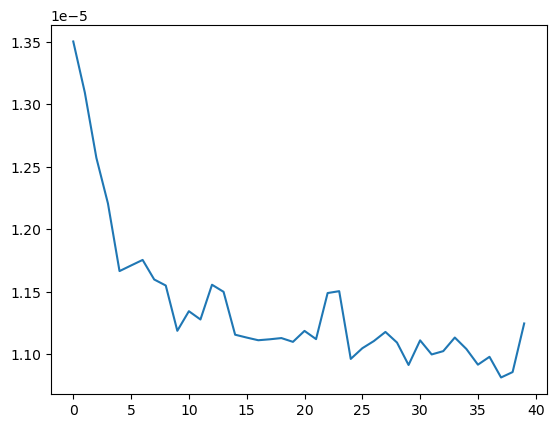

In [59]:
plt.plot(results['hidden_size=15, sequence_length=35, lr=0.0001, penalty:5e-06'][2]['f_norm'][10:])

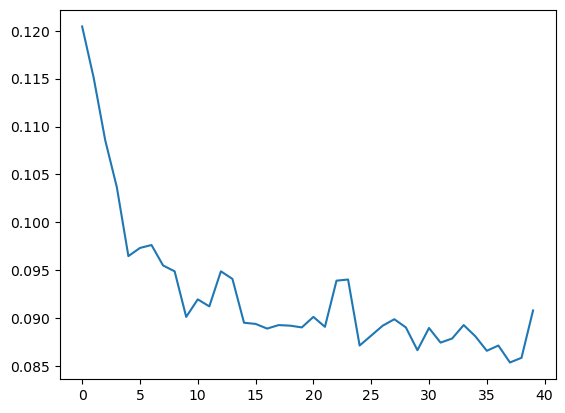

In [ ]:
plt.plot(results['hidden_size=15, sequence_length=35, lr=0.0001, penalty:5e-06'][2]['acc'][10:])

In [63]:
np.mean(results['hidden_size=15, sequence_length=35, lr=0.0001, penalty:5e-06'][2]['acc'][-10:])
np.mean(results['hidden_size=15, sequence_length=35, lr=0.0001, penalty:5e-06'][2]['f_norm'][-10:])
np.mean(results['hidden_size=15, sequence_length=35, lr=0.0001, penalty:5e-06'][2]['f_norm_pen'][-10:])

4.460744185053045e-06

In [65]:
res_df = pd.DataFrame(columns=['f_norm', 'f_norm_pen', 'acc'])
for key, val in results.items():
    f_norm_mean, f_norm_pen_mean, acc_mean = np.mean(val[2]['f_norm'][-5:]), np.mean(val[2]['f_norm_pen'][-5:]), np.mean(val[2]['acc'][-5:])
    res_df.loc[key] = {'f_norm':f_norm_mean, 'f_norm_pen':f_norm_pen_mean, 'acc':acc_mean}

res_df.head()

f_norm  f_norm_pen  \
hidden_size=15, sequence_length=7, lr=0.001, pe...  0.000027    0.000005   
hidden_size=15, sequence_length=7, lr=0.001, pe...  0.000015    0.000004   
hidden_size=15, sequence_length=7, lr=0.001, pe...  0.000008    0.000006   
hidden_size=15, sequence_length=7, lr=0.0001, p...  0.000024    0.000004   
hidden_size=15, sequence_length=7, lr=0.0001, p...  0.000014    0.000005   

                                                         acc  
hidden_size=15, sequence_length=7, lr=0.001, pe...  0.149893  
hidden_size=15, sequence_length=7, lr=0.001, pe...  0.135619  
hidden_size=15, sequence_length=7, lr=0.001, pe...  0.171143  
hidden_size=15, sequence_length=7, lr=0.0001, p...  0.130155  
hidden_size=15, sequence_length=7, lr=0.0001, p...  0.122179

In [68]:
res_df.sort_values(['f_norm', 'acc']).head(20)

f_norm  f_norm_pen  \
hidden_size=15, sequence_length=7, lr=0.0001, p...  0.000006    0.000004   
hidden_size=64, sequence_length=35, lr=0.0001, ...  0.000006    0.000004   
hidden_size=128, sequence_length=14, lr=1e-05, ...  0.000006    0.000004   
hidden_size=64, sequence_length=14, lr=1e-05, p...  0.000006    0.000004   
hidden_size=128, sequence_length=7, lr=1e-05, p...  0.000006    0.000005   
hidden_size=32, sequence_length=35, lr=0.0001, ...  0.000006    0.000004   
hidden_size=64, sequence_length=7, lr=1e-05, pe...  0.000006    0.000004   
hidden_size=15, sequence_length=35, lr=0.0001, ...  0.000006    0.000004   
hidden_size=128, sequence_length=7, lr=0.0001, ...  0.000006    0.000004   
hidden_size=128, sequence_length=35, lr=1e-05, ...  0.000006    0.000005   
hidden_size=64, sequence_length=14, lr=0.0001, ...  0.000006    0.000004   
hidden_size=15, sequence_length=14, lr=0.0001, ...  0.000006    0.000004   
hidden_size=32, sequence_length=7, lr=1e-05, pe...  0.000006    0.000004   
hidden_size=64, sequence_length=35, lr=1e-05, p...  0.000006    0.000005   
hidden_size=128, sequence_length=35, lr=0.0001,...  0.000006    0.000004   
hidden_size=32, sequence_length=14, lr=1e-05, p...  0.000006    0.000004   
hidden_size=32, sequence_length=14, lr=0.0001, ...  0.000006    0.000004   
hidden_size=32, sequence_length=7, lr=0.0001, p...  0.000006    0.000004   
hidden_size=15, sequence_length=35, lr=0.001, p...  0.000006    0.000004   
hidden_size=32, sequence_length=35, lr=1e-05, p...  0.000006    0.000005   

                                                         acc  
hidden_size=15, sequence_length=7, lr=0.0001, p...  0.081714  
hidden_size=64, sequence_length=35, lr=0.0001, ...  0.086581  
hidden_size=128, sequence_length=14, lr=1e-05, ...  0.080383  
hidden_size=64, sequence_length=14, lr=1e-05, p...  0.080898  
hidden_size=128, sequence_length=7, lr=1e-05, p...  0.080940  
hidden_size=32, sequence_length=35, lr=0.0001, ...  0.086361  
hidden_size=64, sequence_length=7, lr=1e-05, pe...  0.087095  
hidden_size=15, sequence_length=35, lr=0.0001, ...  0.092466  
hidden_size=128, sequence_length=7, lr=0.0001, ...  0.096643  
hidden_size=128, sequence_length=35, lr=1e-05, ...  0.086325  
hidden_size=64, sequence_length=14, lr=0.0001, ...  0.100976  
hidden_size=15, sequence_length=14, lr=0.0001, ...  0.105756  
hidden_size=32, sequence_length=7, lr=1e-05, pe...  0.100750  
hidden_size=64, sequence_length=35, lr=1e-05, p...  0.097106  
hidden_size=128, sequence_length=35, lr=0.0001,...  0.106654  
hidden_size=32, sequence_length=14, lr=1e-05, p...  0.113819  
hidden_size=32, sequence_length=14, lr=0.0001, ...  0.122600  
hidden_size=32, sequence_length=7, lr=0.0001, p...  0.120202  
hidden_size=15, sequence_length=35, lr=0.001, p...  0.119890  
hidden_size=32, sequence_length=35, lr=1e-05, p...  0.117546